In [5]:
import pandas as pd
import numpy as np
import yaml
import math
import os
import matplotlib.pyplot as plt
import scipy.stats

min_overs = 300
min_pair_overs = 60  # 1/5th of min_overs

In [7]:
og_data = pd.read_csv('/home/pnans/Documents/Projects/Bowlership/Main Stuff/testout.csv')
bovercnt = og_data.groupby('bowler').count()
bovercnt = bovercnt.drop(['runs', 'wicket'], axis =1)
qbovercnt = bovercnt.loc[bovercnt['over'] >= min_overs]

pd.set_option('display.max_rows', 10000)
#len(qbovercnt)
print(len(bovercnt))

495


In [3]:
paired_data = pd.read_csv('/home/pnans/Documents/Projects/Bowlership/testpair.csv')
paired_data

,runs1,wicket1,over1,bowler1,runs2,wicket2,over2,bowler2
0,10,0,1,B Lee,7,0,2,PM Siddle
1,4,0,3,B Lee,4,0,4,PM Siddle
2,4,0,5,B Lee,1,0,6,PM Siddle
3,5,0,7,B Lee,8,0,8,PM Siddle
4,9,0,9,MG Johnson,4,0,10,PM Siddle
...,...,...,...,...,...,...,...,...
32815,3,0,119,RL Chase,2,0,120,AS Joseph
32816,2,0,121,RL Chase,7,1,122,AS Joseph
32817,5,0,123,RL Chase,4,0,124,AS Joseph
32818,2,0,125,RL Chase,0,0,126,ML Cummins


In [4]:
pairdf = paired_data.groupby(['bowler1','bowler2']).size().append(paired_data.groupby(['bowler2','bowler1']).size())
pairdf

bowler1              bowler2            
A Brindle            JL Gunn                  3
A Dananjaya          CBRLS Kumara             3
                     DM de Silva              2
                     HMRKB Herath             7
                     KAJ Roach                1
                     L Embuldeniya           17
                     MDK Perera               8
                     RAS Lakmal              12
                     VD Philander             1
A Flintoff           AF Giles                 1
                     DL Vettori               4
                     GP Swann                13
                     IR Bell                  2
                     J Lewis                  4
                     JM Anderson              8
                     M Muralitharan           7
                     MJ Hoggard               6
                     MS Panesar               9
                     SCJ Broad               14
                     SJ Harmison             11

In [5]:
#names = og_data['bowler'].unique()
bnames = qbovercnt.index
Bpartners = {}
for name in bnames:
    Bpartners[name] = []
    Bpartners[name] = paired_data.query('bowler1 == @name')['bowler2'].append(paired_data.query('bowler2 == @name')['bowler1']).unique()

len(Bpartners)

64

In [6]:
paircnt = 0 
for k, v in Bpartners.items():
    for name in v:
        povercnt = pairdf[k][name].sum()
        if (povercnt >= min_pair_overs):
            if(k<name):
                print(k,name, povercnt)
                paircnt += 1
print(paircnt)

A Kumble Harbhajan Singh 171
A Kumble Z Khan 68
AD Mathews HMRKB Herath 86
Abdur Rehman Saeed Ajmal 181
Abdur Rehman Umar Gul 76
B Lee SR Clark 76
BA Stokes MM Ali 93
BA Stokes JM Anderson 62
CS Martin DL Vettori 86
D Bishoo RL Chase 71
DBL Powell JE Taylor 67
DL Vettori JS Patel 63
DW Steyn M Morkel 175
DW Steyn M Ntini 216
DW Steyn VD Philander 154
Danish Kaneria Mohammad Sami 61
Danish Kaneria Umar Gul 121
FH Edwards JE Taylor 73
GP Swann MS Panesar 76
GP Swann SCJ Broad 139
GP Swann JM Anderson 153
GP Swann TT Bresnan 96
HMRKB Herath N Pradeep 96
HMRKB Herath RAS Lakmal 102
HMRKB Herath MDK Perera 118
HMRKB Herath RMS Eranga 87
HMRKB Herath S Randiv 71
Harbhajan Singh Z Khan 121
Harbhajan Singh I Sharma 129
Harbhajan Singh PP Ojha 147
I Sharma Mohammed Shami 64
I Sharma UT Yadav 72
I Sharma R Ashwin 158
I Sharma Z Khan 141
I Sharma PP Ojha 62
I Sharma RA Jadeja 69
JE Taylor KAJ Roach 64
JE Taylor SJ Benn 102
JH Kallis PL Harris 62
JH Kallis M Morkel 93
JM Anderson SCJ Broad 548
JM 

In [7]:
bocnt = 0 
Bpartner_qualified = {}
for k, v in Bpartners.items():
    Bpartner_qualified[k] = []
    for name in v:
        bocnt = pairdf[k][name].sum()
        if (bocnt >= min_pair_overs):
            Bpartner_qualified[k].append(name)

for k,v in Bpartners.items():
    if Bpartner_qualified[k] == []:
        del Bpartner_qualified[k]
            
#Bpartner_qualified
print(len(Bpartner_qualified))
print(Bpartner_qualified)

#Bpartner_qualified.keys()

61
{'A Kumble': ['Harbhajan Singh', 'Z Khan'], 'AD Mathews': ['HMRKB Herath'], 'Abdur Rehman': ['Saeed Ajmal', 'Umar Gul'], 'B Lee': ['SR Clark'], 'BA Stokes': ['MM Ali', 'JM Anderson'], 'CS Martin': ['DL Vettori'], 'D Bishoo': ['RL Chase'], 'DBL Powell': ['JE Taylor'], 'DL Vettori': ['CS Martin', 'JS Patel'], 'DW Steyn': ['M Morkel', 'M Ntini', 'VD Philander'], 'Danish Kaneria': ['Mohammad Sami', 'Umar Gul'], 'FH Edwards': ['JE Taylor'], 'GP Swann': ['MS Panesar', 'SCJ Broad', 'JM Anderson', 'TT Bresnan'], 'HMRKB Herath': ['N Pradeep', 'RAS Lakmal', 'AD Mathews', 'MDK Perera', 'RMS Eranga', 'S Randiv'], 'Harbhajan Singh': ['A Kumble', 'Z Khan', 'I Sharma', 'A Mishra', 'PP Ojha'], 'I Sharma': ['Harbhajan Singh', 'Mohammed Shami', 'UT Yadav', 'R Ashwin', 'Z Khan', 'PP Ojha', 'RA Jadeja'], 'JE Taylor': ['KAJ Roach', 'SJ Benn', 'FH Edwards', 'DBL Powell'], 'JH Kallis': ['PL Harris', 'A Nel', 'M Morkel'], 'JM Anderson': ['SCJ Broad', 'MS Panesar', 'CT Tremlett', 'ST Finn', 'BA Stokes', 'GP

In [8]:
for name in Bpartner_qualified.keys():
    dfbowler = og_data.loc[og_data['bowler'] == name]
    for pname in Bpartner_qualified[name]:
        dfpairab = paired_data.loc[paired_data['bowler1']==name] 
        dfpairab = dfpairab.loc[dfpairab['bowler2']==pname]
        dfpairba = paired_data.loc[paired_data['bowler2']==name]
        dfpairba = dfpairba.loc[dfpairba['bowler1']==pname]
        break
dfpairba

,runs1,wicket1,over1,bowler1,runs2,wicket2,over2,bowler2
4505,4,0,86,I Sharma,2,0,87,Z Khan
4506,0,0,88,I Sharma,2,0,89,Z Khan
4507,2,0,90,I Sharma,2,0,91,Z Khan
4508,11,0,92,I Sharma,4,0,93,Z Khan
4509,0,0,94,I Sharma,4,0,95,Z Khan
4510,9,0,96,I Sharma,6,0,97,Z Khan
7949,0,0,91,I Sharma,0,0,92,Z Khan
8327,6,0,23,I Sharma,2,0,24,Z Khan
8328,8,0,25,I Sharma,1,0,26,Z Khan
8329,12,0,27,I Sharma,6,0,28,Z Khan


A Kumble Harbhajan Singh


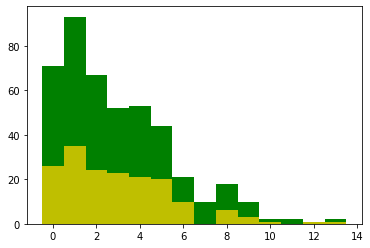

Bowler's Economy  :  2.9708520179372195
Bowlership's Economy  :  2.9590643274853803


Bowler's Skew     :  1.0415140413764932
Bowlership's Skew :  0.2033092598091679
Bowler's Kurtosis     :  0.8866815874409362
Bowlership's Kurtosis :  -1.3396868682238112


Greater : Statistics=107.00, p=0.12 
Two-Sided : Statistics=107.00, p=0.25 
Less : Statistics=107.00, p=0.89 

____________________________________________


A Kumble Z Khan


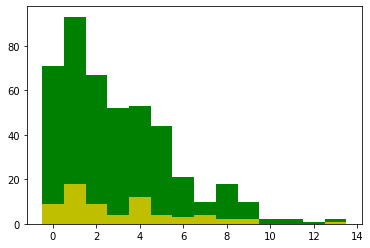

Bowler's Economy  :  2.9708520179372195
Bowlership's Economy  :  3.073529411764706


Bowler's Skew     :  1.0415140413764932
Bowlership's Skew :  1.1187231481336877
Bowler's Kurtosis     :  0.8866815874409362
Bowlership's Kurtosis :  0.2261728023335956


Greater : Statistics=112.00, p=0.03 
Two-Sided : Statistics=112.00, p=0.06 
Less : Statistics=112.00, p=0.97 

____________________________________________


AD Mathews HMRKB Herath


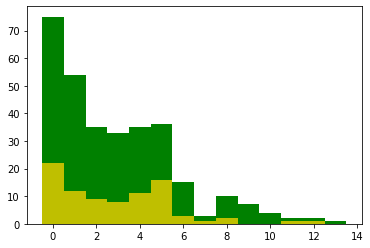

Bowler's Economy  :  2.871794871794872
Bowlership's Economy  :  2.813953488372093


Bowler's Skew     :  1.0644075122013192
Bowlership's Skew :  0.6795962752804635
Bowler's Kurtosis     :  0.8377580307670409
Bowlership's Kurtosis :  -0.5844426808298469


Greater : Statistics=105.00, p=0.07 
Two-Sided : Statistics=105.00, p=0.13 
Less : Statistics=105.00, p=0.94 

____________________________________________


Abdur Rehman Saeed Ajmal


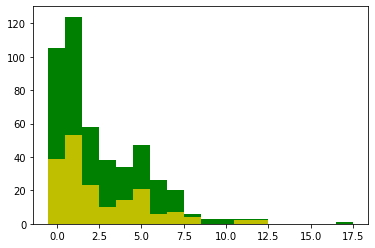

Bowler's Economy  :  2.573248407643312
Bowlership's Economy  :  2.5027624309392267


Bowler's Skew     :  1.370505519024071
Bowlership's Skew :  1.173982876257988
Bowler's Kurtosis     :  2.433158349485204
Bowlership's Kurtosis :  0.22149873063230352


Greater : Statistics=88.50, p=0.27 
Two-Sided : Statistics=88.50, p=0.55 
Less : Statistics=88.50, p=0.74 

____________________________________________


Abdur Rehman Umar Gul


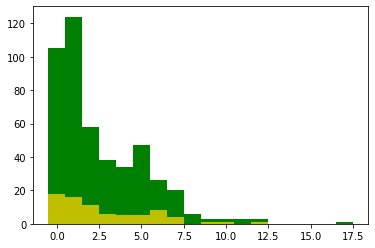

Bowler's Economy  :  2.573248407643312
Bowlership's Economy  :  2.736842105263158


Bowler's Skew     :  1.370505519024071
Bowlership's Skew :  0.7906778478921236
Bowler's Kurtosis     :  2.433158349485204
Bowlership's Kurtosis :  -0.5959509632749773


Greater : Statistics=108.00, p=0.05 
Two-Sided : Statistics=108.00, p=0.09 
Less : Statistics=108.00, p=0.96 

____________________________________________


B Lee SR Clark


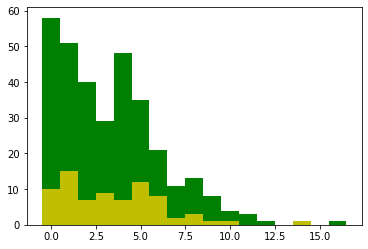

Bowler's Economy  :  3.330246913580247
Bowlership's Economy  :  3.460526315789474


Bowler's Skew     :  0.981220601791701
Bowlership's Skew :  0.29766256862068236
Bowler's Kurtosis     :  1.0993206335384524
Bowlership's Kurtosis :  -1.064134404674945


Greater : Statistics=126.50, p=0.04 
Two-Sided : Statistics=126.50, p=0.08 
Less : Statistics=126.50, p=0.97 

____________________________________________


BA Stokes MM Ali


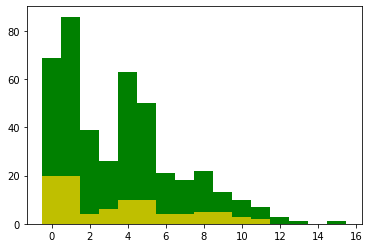

Bowler's Economy  :  3.5664335664335662
Bowlership's Economy  :  3.4946236559139785


Bowler's Skew     :  0.8134453527078659
Bowlership's Skew :  1.2584028419429012
Bowler's Kurtosis     :  0.06383729865656251
Bowlership's Kurtosis :  0.13115057490045645


Greater : Statistics=134.50, p=0.02 
Two-Sided : Statistics=134.50, p=0.03 
Less : Statistics=134.50, p=0.99 

BA Stokes - MM Ali better than BA Stokes
____________________________________________


BA Stokes JM Anderson


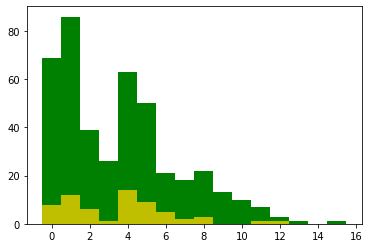

Bowler's Economy  :  3.5664335664335662
Bowlership's Economy  :  3.532258064516129


Bowler's Skew     :  0.8134453527078659
Bowlership's Skew :  0.5655600210494095
Bowler's Kurtosis     :  0.06383729865656251
Bowlership's Kurtosis :  -0.9785691966915504


Greater : Statistics=132.50, p=0.00 
Two-Sided : Statistics=132.50, p=0.01 
Less : Statistics=132.50, p=1.00 

BA Stokes - JM Anderson better than BA Stokes
____________________________________________


CS Martin DL Vettori


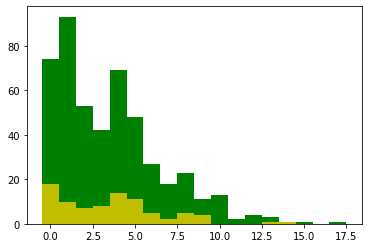

Bowler's Economy  :  3.5134575569358177
Bowlership's Economy  :  3.558139534883721


Bowler's Skew     :  1.0559935504765279
Bowlership's Skew :  0.6427584828649684
Bowler's Kurtosis     :  1.044917027678249
Bowlership's Kurtosis :  -0.4991860178137548


Greater : Statistics=139.00, p=0.05 
Two-Sided : Statistics=139.00, p=0.10 
Less : Statistics=139.00, p=0.95 

____________________________________________


D Bishoo RL Chase


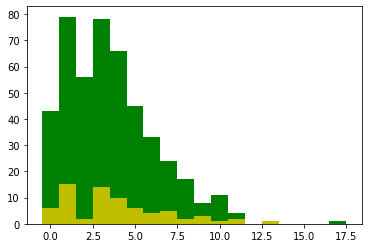

Bowler's Economy  :  3.587982832618026
Bowlership's Economy  :  3.915492957746479


Bowler's Skew     :  0.9503226295971487
Bowlership's Skew :  1.0316001127745114
Bowler's Kurtosis     :  1.1952223402671969
Bowlership's Kurtosis :  -0.25924244897959436


Greater : Statistics=146.50, p=0.00 
Two-Sided : Statistics=146.50, p=0.01 
Less : Statistics=146.50, p=1.00 

____________________________________________


DBL Powell JE Taylor


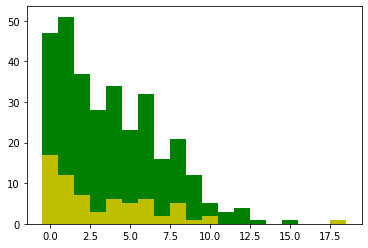

Bowler's Economy  :  3.8512658227848102
Bowlership's Economy  :  3.298507462686567


Bowler's Skew     :  0.8730855426971086
Bowlership's Skew :  1.2816794580896789
Bowler's Kurtosis     :  0.6814651156915921
Bowlership's Kurtosis :  0.8628531918639979


Greater : Statistics=136.00, p=0.03 
Two-Sided : Statistics=136.00, p=0.07 
Less : Statistics=136.00, p=0.97 

____________________________________________


DL Vettori CS Martin


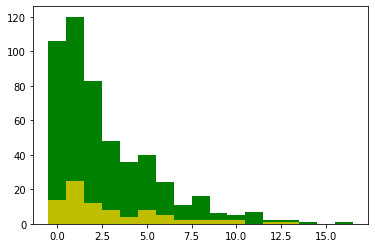

Bowler's Economy  :  2.7244094488188977
Bowlership's Economy  :  2.9302325581395348


Bowler's Skew     :  1.4748305566087658
Bowlership's Skew :  1.5386876166326027
Bowler's Kurtosis     :  2.2428347555949655
Bowlership's Kurtosis :  1.6619035651380898


Greater : Statistics=145.50, p=0.04 
Two-Sided : Statistics=145.50, p=0.07 
Less : Statistics=145.50, p=0.97 

____________________________________________


DL Vettori JS Patel


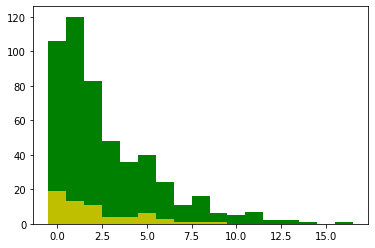

Bowler's Economy  :  2.7244094488188977
Bowlership's Economy  :  2.142857142857143


Bowler's Skew     :  1.4748305566087658
Bowlership's Skew :  1.007713436426842
Bowler's Kurtosis     :  2.2428347555949655
Bowlership's Kurtosis :  -0.21748117611445172


Greater : Statistics=115.00, p=0.03 
Two-Sided : Statistics=115.00, p=0.07 
Less : Statistics=115.00, p=0.97 

____________________________________________


DW Steyn M Morkel


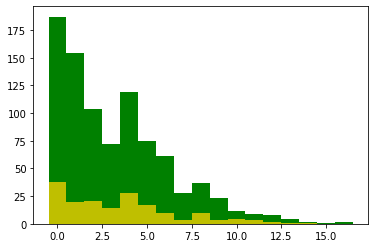

Bowler's Economy  :  3.269487750556793
Bowlership's Economy  :  3.5028571428571427


Bowler's Skew     :  1.0763005097002312
Bowlership's Skew :  0.9656718668088464
Bowler's Kurtosis     :  0.9767372404590411
Bowlership's Kurtosis :  -0.0007538504825950199


Greater : Statistics=181.00, p=0.02 
Two-Sided : Statistics=181.00, p=0.05 
Less : Statistics=181.00, p=0.98 

____________________________________________


DW Steyn M Ntini


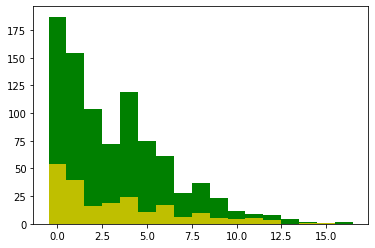

Bowler's Economy  :  3.269487750556793
Bowlership's Economy  :  3.2824074074074074


Bowler's Skew     :  1.0763005097002312
Bowlership's Skew :  1.48440234714722
Bowler's Kurtosis     :  0.9767372404590411
Bowlership's Kurtosis :  1.352839928446727


Greater : Statistics=174.50, p=0.04 
Two-Sided : Statistics=174.50, p=0.08 
Less : Statistics=174.50, p=0.96 

____________________________________________


DW Steyn VD Philander


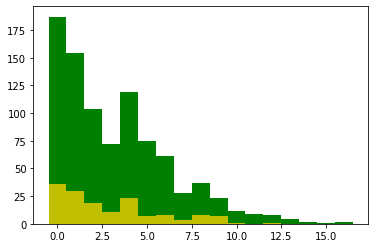

Bowler's Economy  :  3.269487750556793
Bowlership's Economy  :  2.896103896103896


Bowler's Skew     :  1.0763005097002312
Bowlership's Skew :  0.8553829833416626
Bowler's Kurtosis     :  0.9767372404590411
Bowlership's Kurtosis :  -0.5543730146207073


Greater : Statistics=144.50, p=0.03 
Two-Sided : Statistics=144.50, p=0.06 
Less : Statistics=144.50, p=0.97 

____________________________________________


Danish Kaneria Mohammad Sami


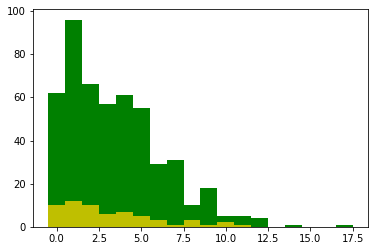

Bowler's Economy  :  3.463073852295409
Bowlership's Economy  :  3.1475409836065573


Bowler's Skew     :  1.0012995410437122
Bowlership's Skew :  0.5124477637652709
Bowler's Kurtosis     :  1.0678662575967168
Bowlership's Kurtosis :  -1.1353248169932848


Greater : Statistics=140.00, p=0.01 
Two-Sided : Statistics=140.00, p=0.02 
Less : Statistics=140.00, p=0.99 

Danish Kaneria - Mohammad Sami better than Danish Kaneria
____________________________________________


Danish Kaneria Umar Gul


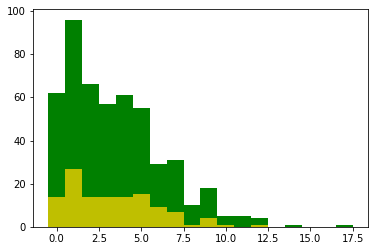

Bowler's Economy  :  3.463073852295409
Bowlership's Economy  :  3.28099173553719


Bowler's Skew     :  1.0012995410437122
Bowlership's Skew :  0.5423075640737592
Bowler's Kurtosis     :  1.0678662575967168
Bowlership's Kurtosis :  -0.15891088823698007


Greater : Statistics=127.50, p=0.03 
Two-Sided : Statistics=127.50, p=0.07 
Less : Statistics=127.50, p=0.97 

____________________________________________


FH Edwards JE Taylor


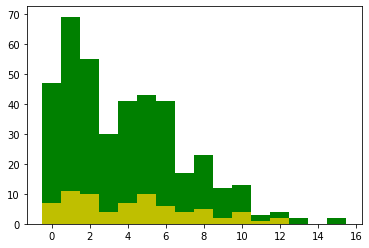

Bowler's Economy  :  3.91044776119403
Bowlership's Economy  :  4.3561643835616435


Bowler's Skew     :  0.7769040649662726
Bowlership's Skew :  0.3130230532194637
Bowler's Kurtosis     :  0.1363232121665594
Bowlership's Kurtosis :  -1.0653137439980305


Greater : Statistics=154.50, p=0.00 
Two-Sided : Statistics=154.50, p=0.01 
Less : Statistics=154.50, p=1.00 

____________________________________________


GP Swann MS Panesar


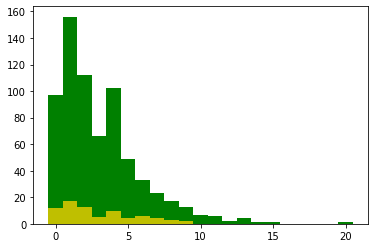

Bowler's Economy  :  3.0492753623188404
Bowlership's Economy  :  2.9473684210526314


Bowler's Skew     :  1.4902620239267246
Bowlership's Skew :  0.6321614583333337
Bowler's Kurtosis     :  3.2828942925741256
Bowlership's Kurtosis :  -0.9494538483796289


Greater : Statistics=113.00, p=0.08 
Two-Sided : Statistics=113.00, p=0.17 
Less : Statistics=113.00, p=0.92 

____________________________________________


GP Swann SCJ Broad


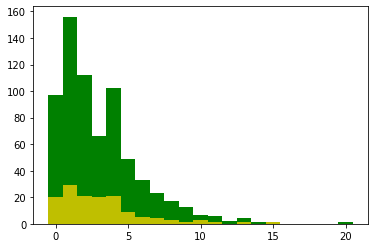

Bowler's Economy  :  3.0492753623188404
Bowlership's Economy  :  3.0215827338129495


Bowler's Skew     :  1.4902620239267246
Bowlership's Skew :  0.63643716989398
Bowler's Kurtosis     :  3.2828942925741256
Bowlership's Kurtosis :  -1.1844701603394956


Greater : Statistics=161.50, p=0.05 
Two-Sided : Statistics=161.50, p=0.09 
Less : Statistics=161.50, p=0.96 

____________________________________________


GP Swann JM Anderson


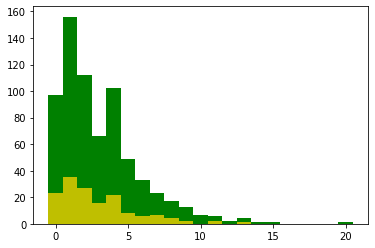

Bowler's Economy  :  3.0492753623188404
Bowlership's Economy  :  2.843137254901961


Bowler's Skew     :  1.4902620239267246
Bowlership's Skew :  0.6569081781138235
Bowler's Kurtosis     :  3.2828942925741256
Bowlership's Kurtosis :  -0.9340461315849038


Greater : Statistics=124.50, p=0.16 
Two-Sided : Statistics=124.50, p=0.33 
Less : Statistics=124.50, p=0.85 

____________________________________________


GP Swann TT Bresnan


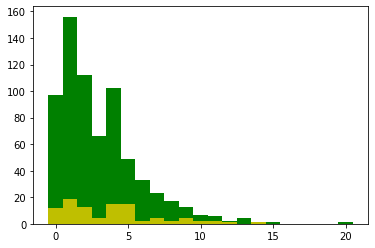

Bowler's Economy  :  3.0492753623188404
Bowlership's Economy  :  3.6666666666666665


Bowler's Skew     :  1.4902620239267246
Bowlership's Skew :  0.7043150492113174
Bowler's Kurtosis     :  3.2828942925741256
Bowlership's Kurtosis :  -1.146124774457811


Greater : Statistics=168.00, p=0.03 
Two-Sided : Statistics=168.00, p=0.05 
Less : Statistics=168.00, p=0.98 

____________________________________________


HMRKB Herath N Pradeep


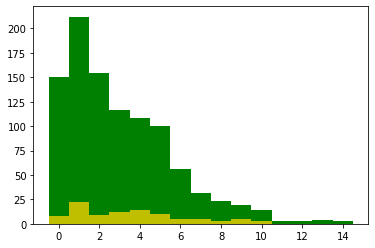

Bowler's Economy  :  3.027054108216433
Bowlership's Economy  :  3.6041666666666665


Bowler's Skew     :  1.1549547041126829
Bowlership's Skew :  1.1310125646933353
Bowler's Kurtosis     :  1.3821867939021093
Bowlership's Kurtosis :  0.6273525214298838


Greater : Statistics=123.50, p=0.02 
Two-Sided : Statistics=123.50, p=0.03 
Less : Statistics=123.50, p=0.98 

____________________________________________


HMRKB Herath RAS Lakmal


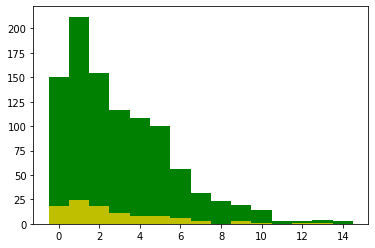

Bowler's Economy  :  3.027054108216433
Bowlership's Economy  :  2.784313725490196


Bowler's Skew     :  1.1549547041126829
Bowlership's Skew :  0.7792046844482172
Bowler's Kurtosis     :  1.3821867939021093
Bowlership's Kurtosis :  -0.6683319342355807


Greater : Statistics=144.00, p=0.00 
Two-Sided : Statistics=144.00, p=0.01 
Less : Statistics=144.00, p=1.00 

HMRKB Herath - RAS Lakmal better than HMRKB Herath
____________________________________________


HMRKB Herath AD Mathews


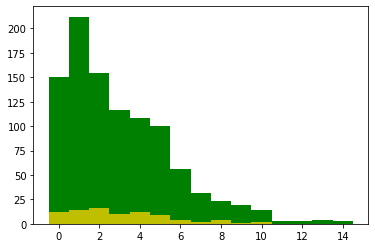

Bowler's Economy  :  3.027054108216433
Bowlership's Economy  :  3.116279069767442


Bowler's Skew     :  1.1549547041126829
Bowlership's Skew :  0.08077507736089558
Bowler's Kurtosis     :  1.3821867939021093
Bowlership's Kurtosis :  -1.4978484022021958


Greater : Statistics=132.50, p=0.01 
Two-Sided : Statistics=132.50, p=0.01 
Less : Statistics=132.50, p=1.00 

____________________________________________


HMRKB Herath MDK Perera


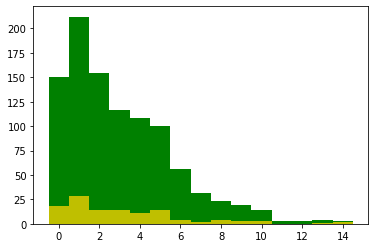

Bowler's Economy  :  3.027054108216433
Bowlership's Economy  :  3.2203389830508473


Bowler's Skew     :  1.1549547041126829
Bowlership's Skew :  0.9323475897904069
Bowler's Kurtosis     :  1.3821867939021093
Bowlership's Kurtosis :  0.0030452815068877648


Greater : Statistics=155.50, p=0.00 
Two-Sided : Statistics=155.50, p=0.01 
Less : Statistics=155.50, p=1.00 

____________________________________________


HMRKB Herath RMS Eranga


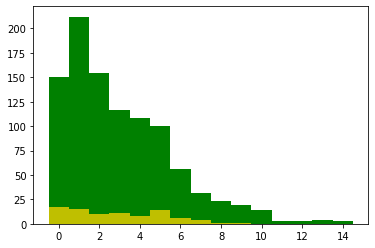

Bowler's Economy  :  3.027054108216433
Bowlership's Economy  :  2.8850574712643677


Bowler's Skew     :  1.1549547041126829
Bowlership's Skew :  -0.0328373163870368
Bowler's Kurtosis     :  1.3821867939021093
Bowlership's Kurtosis :  -1.275602271431386


Greater : Statistics=116.00, p=0.01 
Two-Sided : Statistics=116.00, p=0.02 
Less : Statistics=116.00, p=0.99 

HMRKB Herath - RMS Eranga better than HMRKB Herath
____________________________________________


HMRKB Herath S Randiv


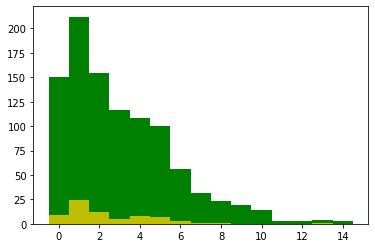

Bowler's Economy  :  3.027054108216433
Bowlership's Economy  :  2.4788732394366195


Bowler's Skew     :  1.1549547041126829
Bowlership's Skew :  1.403463247502199
Bowler's Kurtosis     :  1.3821867939021093
Bowlership's Kurtosis :  1.3370311508218942


Greater : Statistics=121.50, p=0.01 
Two-Sided : Statistics=121.50, p=0.01 
Less : Statistics=121.50, p=1.00 

HMRKB Herath - S Randiv better than HMRKB Herath
____________________________________________


Harbhajan Singh A Kumble


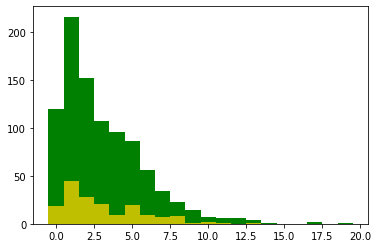

Bowler's Economy  :  3.0784103114930184
Bowlership's Economy  :  3.0409356725146197


Bowler's Skew     :  1.4650028462722022
Bowlership's Skew :  1.1429283316129126
Bowler's Kurtosis     :  3.184510210262716
Bowlership's Kurtosis :  0.6353102515894169


Greater : Statistics=145.00, p=0.08 
Two-Sided : Statistics=145.00, p=0.15 
Less : Statistics=145.00, p=0.93 

____________________________________________


Harbhajan Singh Z Khan


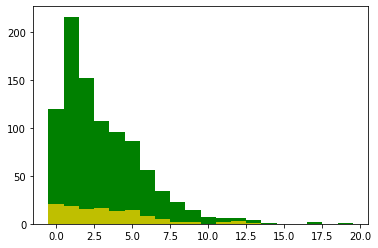

Bowler's Economy  :  3.0784103114930184
Bowlership's Economy  :  3.3636363636363638


Bowler's Skew     :  1.4650028462722022
Bowlership's Skew :  0.24226755044828122
Bowler's Kurtosis     :  3.184510210262716
Bowlership's Kurtosis :  -1.4905694757669148


Greater : Statistics=152.00, p=0.04 
Two-Sided : Statistics=152.00, p=0.09 
Less : Statistics=152.00, p=0.96 

____________________________________________


Harbhajan Singh I Sharma


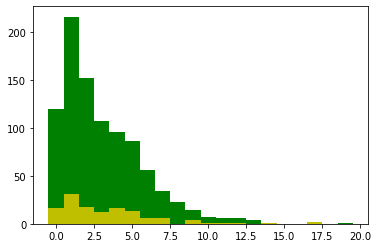

Bowler's Economy  :  3.0784103114930184
Bowlership's Economy  :  3.3410852713178296


Bowler's Skew     :  1.4650028462722022
Bowlership's Skew :  0.9977715859310262
Bowler's Kurtosis     :  3.184510210262716
Bowlership's Kurtosis :  0.28859116055634004


Greater : Statistics=171.00, p=0.02 
Two-Sided : Statistics=171.00, p=0.04 
Less : Statistics=171.00, p=0.98 

____________________________________________


Harbhajan Singh A Mishra


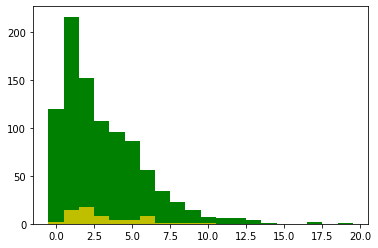

Bowler's Economy  :  3.0784103114930184
Bowlership's Economy  :  3.096774193548387


Bowler's Skew     :  1.4650028462722022
Bowlership's Skew :  1.0892935033027054
Bowler's Kurtosis     :  3.184510210262716
Bowlership's Kurtosis :  -0.08629166517644293


Greater : Statistics=144.00, p=0.01 
Two-Sided : Statistics=144.00, p=0.02 
Less : Statistics=144.00, p=0.99 

____________________________________________


Harbhajan Singh PP Ojha


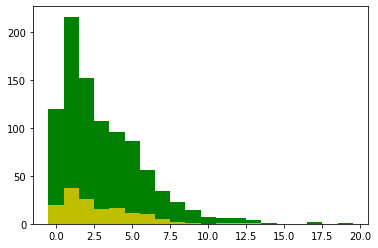

Bowler's Economy  :  3.0784103114930184
Bowlership's Economy  :  2.8095238095238093


Bowler's Skew     :  1.4650028462722022
Bowlership's Skew :  0.9199793326824943
Bowler's Kurtosis     :  3.184510210262716
Bowlership's Kurtosis :  -0.061951914446334744


Greater : Statistics=153.50, p=0.04 
Two-Sided : Statistics=153.50, p=0.07 
Less : Statistics=153.50, p=0.97 

____________________________________________


I Sharma Harbhajan Singh


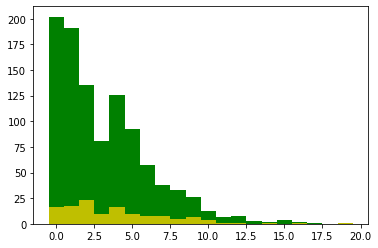

Bowler's Economy  :  3.1949069539666994
Bowlership's Economy  :  4.077519379844961


Bowler's Skew     :  1.3203811782704433
Bowlership's Skew :  0.6731055486654243
Bowler's Kurtosis     :  2.161179381400732
Bowlership's Kurtosis :  -0.578170188577745


Greater : Statistics=214.00, p=0.02 
Two-Sided : Statistics=214.00, p=0.04 
Less : Statistics=214.00, p=0.98 

____________________________________________


I Sharma Mohammed Shami


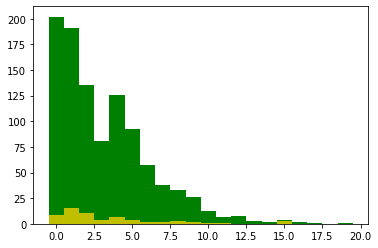

Bowler's Economy  :  3.1949069539666994
Bowlership's Economy  :  3.609375


Bowler's Skew     :  1.3203811782704433
Bowlership's Skew :  1.1895458381049717
Bowler's Kurtosis     :  2.161179381400732
Bowlership's Kurtosis :  0.2612681314691758


Greater : Statistics=184.50, p=0.01 
Two-Sided : Statistics=184.50, p=0.02 
Less : Statistics=184.50, p=0.99 

____________________________________________


I Sharma UT Yadav


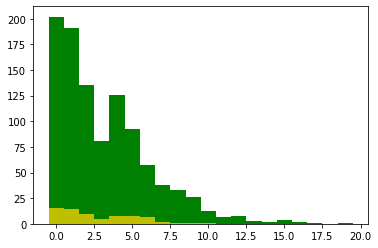

Bowler's Economy  :  3.1949069539666994
Bowlership's Economy  :  2.8333333333333335


Bowler's Skew     :  1.3203811782704433
Bowlership's Skew :  0.3640826452823794
Bowler's Kurtosis     :  2.161179381400732
Bowlership's Kurtosis :  -1.0907831830153059


Greater : Statistics=149.50, p=0.03 
Two-Sided : Statistics=149.50, p=0.05 
Less : Statistics=149.50, p=0.98 

____________________________________________


I Sharma R Ashwin


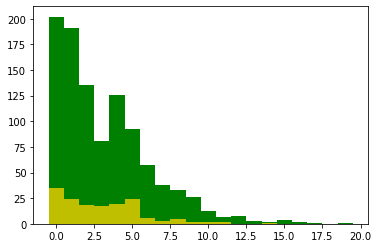

Bowler's Economy  :  3.1949069539666994
Bowlership's Economy  :  3.0253164556962027


Bowler's Skew     :  1.3203811782704433
Bowlership's Skew :  0.611577406035797
Bowler's Kurtosis     :  2.161179381400732
Bowlership's Kurtosis :  -0.8770530420344853


Greater : Statistics=164.50, p=0.06 
Two-Sided : Statistics=164.50, p=0.12 
Less : Statistics=164.50, p=0.94 

____________________________________________


I Sharma Z Khan


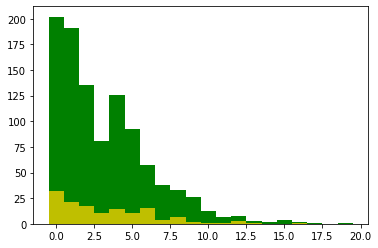

Bowler's Economy  :  3.1949069539666994
Bowlership's Economy  :  3.382978723404255


Bowler's Skew     :  1.3203811782704433
Bowlership's Skew :  1.022525202272252
Bowler's Kurtosis     :  2.161179381400732
Bowlership's Kurtosis :  0.3677751013085442


Greater : Statistics=199.50, p=0.02 
Two-Sided : Statistics=199.50, p=0.05 
Less : Statistics=199.50, p=0.98 

____________________________________________


I Sharma PP Ojha


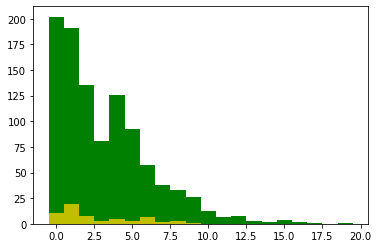

Bowler's Economy  :  3.1949069539666994
Bowlership's Economy  :  2.7096774193548385


Bowler's Skew     :  1.3203811782704433
Bowlership's Skew :  1.372075861510347
Bowler's Kurtosis     :  2.161179381400732
Bowlership's Kurtosis :  1.0140159665386408


Greater : Statistics=135.50, p=0.03 
Two-Sided : Statistics=135.50, p=0.07 
Less : Statistics=135.50, p=0.97 

____________________________________________


I Sharma RA Jadeja


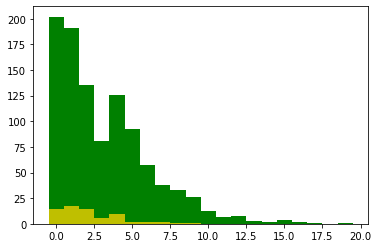

Bowler's Economy  :  3.1949069539666994
Bowlership's Economy  :  2.260869565217391


Bowler's Skew     :  1.3203811782704433
Bowlership's Skew :  0.4784078540345094
Bowler's Kurtosis     :  2.161179381400732
Bowlership's Kurtosis :  -1.4332140755185163


Greater : Statistics=138.00, p=0.03 
Two-Sided : Statistics=138.00, p=0.05 
Less : Statistics=138.00, p=0.98 

____________________________________________


JE Taylor KAJ Roach


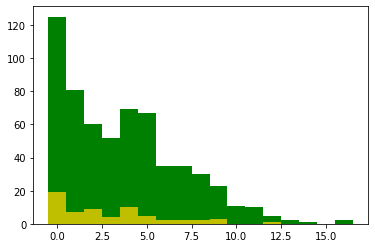

Bowler's Economy  :  3.6546052631578947
Bowlership's Economy  :  2.859375


Bowler's Skew     :  0.80146994207725
Bowlership's Skew :  1.4663723839832323
Bowler's Kurtosis     :  0.17864420969975336
Bowlership's Kurtosis :  1.4175127458894945


Greater : Statistics=141.50, p=0.00 
Two-Sided : Statistics=141.50, p=0.01 
Less : Statistics=141.50, p=1.00 

JE Taylor - KAJ Roach better than JE Taylor
____________________________________________


JE Taylor SJ Benn


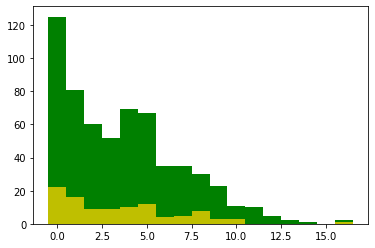

Bowler's Economy  :  3.6546052631578947
Bowlership's Economy  :  3.5


Bowler's Skew     :  0.80146994207725
Bowlership's Skew :  0.8735006273656254
Bowler's Kurtosis     :  0.17864420969975336
Bowlership's Kurtosis :  0.10983381462849984


Greater : Statistics=144.50, p=0.01 
Two-Sided : Statistics=144.50, p=0.03 
Less : Statistics=144.50, p=0.99 

JE Taylor - SJ Benn better than JE Taylor
____________________________________________


JE Taylor FH Edwards


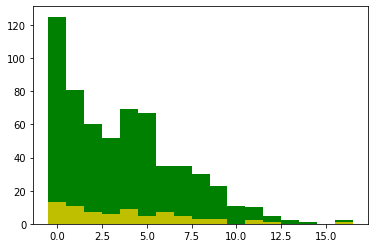

Bowler's Economy  :  3.6546052631578947
Bowlership's Economy  :  3.863013698630137


Bowler's Skew     :  0.80146994207725
Bowlership's Skew :  0.5294401944725885
Bowler's Kurtosis     :  0.17864420969975336
Bowlership's Kurtosis :  -0.6692563592843515


Greater : Statistics=164.50, p=0.00 
Two-Sided : Statistics=164.50, p=0.01 
Less : Statistics=164.50, p=1.00 

____________________________________________


JE Taylor DBL Powell


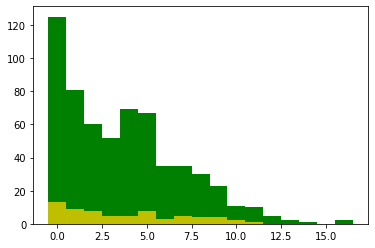

Bowler's Economy  :  3.6546052631578947
Bowlership's Economy  :  3.7611940298507465


Bowler's Skew     :  0.80146994207725
Bowlership's Skew :  0.764241017352733
Bowler's Kurtosis     :  0.17864420969975336
Bowlership's Kurtosis :  -0.005514016237642139


Greater : Statistics=152.00, p=0.00 
Two-Sided : Statistics=152.00, p=0.01 
Less : Statistics=152.00, p=1.00 

____________________________________________


JH Kallis PL Harris


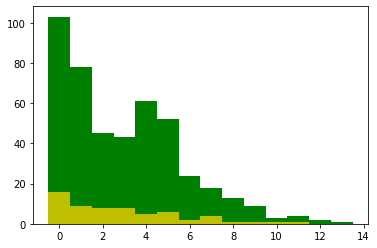

Bowler's Economy  :  2.9978070175438596
Bowlership's Economy  :  2.8548387096774195


Bowler's Skew     :  0.8677315697296835
Bowlership's Skew :  1.0461460008714778
Bowler's Kurtosis     :  0.35665672504936685
Bowlership's Kurtosis :  0.5096677838140704


Greater : Statistics=134.50, p=0.00 
Two-Sided : Statistics=134.50, p=0.01 
Less : Statistics=134.50, p=1.00 

JH Kallis - PL Harris better than JH Kallis
____________________________________________


JH Kallis A Nel


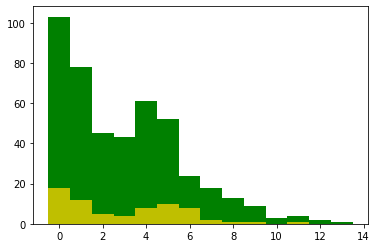

Bowler's Economy  :  2.9978070175438596
Bowlership's Economy  :  2.942857142857143


Bowler's Skew     :  0.8677315697296835
Bowlership's Skew :  0.8035557232398325
Bowler's Kurtosis     :  0.35665672504936685
Bowlership's Kurtosis :  -0.23386596661033998


Greater : Statistics=119.00, p=0.01 
Two-Sided : Statistics=119.00, p=0.02 
Less : Statistics=119.00, p=0.99 

JH Kallis - A Nel better than JH Kallis
____________________________________________


JH Kallis M Morkel


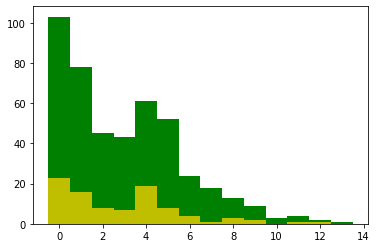

Bowler's Economy  :  2.9978070175438596
Bowlership's Economy  :  2.849462365591398


Bowler's Skew     :  0.8677315697296835
Bowlership's Skew :  0.9236231351366533
Bowler's Kurtosis     :  0.35665672504936685
Bowlership's Kurtosis :  -0.5311103201199305


Greater : Statistics=127.00, p=0.01 
Two-Sided : Statistics=127.00, p=0.03 
Less : Statistics=127.00, p=0.99 

JH Kallis - M Morkel better than JH Kallis
____________________________________________


JM Anderson SCJ Broad


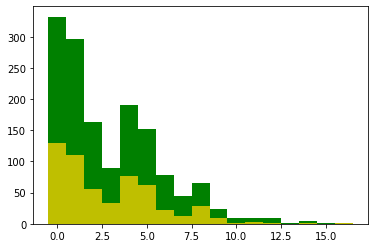

Bowler's Economy  :  2.9619823489477257
Bowlership's Economy  :  2.8704379562043796


Bowler's Skew     :  1.09839943894017
Bowlership's Skew :  1.056557466657034
Bowler's Kurtosis     :  1.1687417630677421
Bowlership's Kurtosis :  -0.0868112925047515


Greater : Statistics=160.00, p=0.11 
Two-Sided : Statistics=160.00, p=0.23 
Less : Statistics=160.00, p=0.89 

____________________________________________


JM Anderson MS Panesar


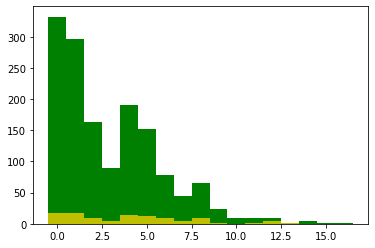

Bowler's Economy  :  2.9619823489477257
Bowlership's Economy  :  3.9320388349514563


Bowler's Skew     :  1.09839943894017
Bowlership's Skew :  0.2878237347338608
Bowler's Kurtosis     :  1.1687417630677421
Bowlership's Kurtosis :  -1.2034700055893792


Greater : Statistics=165.50, p=0.01 
Two-Sided : Statistics=165.50, p=0.02 
Less : Statistics=165.50, p=0.99 

____________________________________________


JM Anderson CT Tremlett


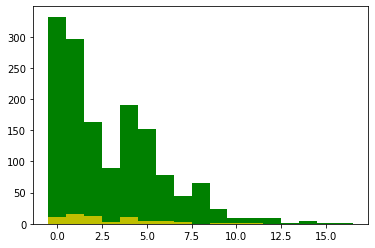

Bowler's Economy  :  2.9619823489477257
Bowlership's Economy  :  2.8676470588235294


Bowler's Skew     :  1.09839943894017
Bowlership's Skew :  0.5251543899814134
Bowler's Kurtosis     :  1.1687417630677421
Bowlership's Kurtosis :  -1.3334600633263984


Greater : Statistics=144.00, p=0.01 
Two-Sided : Statistics=144.00, p=0.02 
Less : Statistics=144.00, p=0.99 

JM Anderson - CT Tremlett better than JM Anderson
____________________________________________


JM Anderson ST Finn


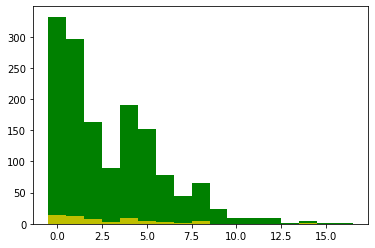

Bowler's Economy  :  2.9619823489477257
Bowlership's Economy  :  2.8548387096774195


Bowler's Skew     :  1.09839943894017
Bowlership's Skew :  0.6349015337907477
Bowler's Kurtosis     :  1.1687417630677421
Bowlership's Kurtosis :  -1.000133525610212


Greater : Statistics=131.00, p=0.01 
Two-Sided : Statistics=131.00, p=0.02 
Less : Statistics=131.00, p=0.99 

JM Anderson - ST Finn better than JM Anderson
____________________________________________


JM Anderson BA Stokes


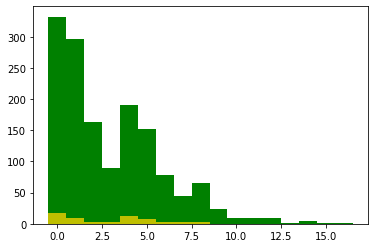

Bowler's Economy  :  2.9619823489477257
Bowlership's Economy  :  2.7580645161290325


Bowler's Skew     :  1.09839943894017
Bowlership's Skew :  1.0344448060946572
Bowler's Kurtosis     :  1.1687417630677421
Bowlership's Kurtosis :  -0.20058330774966082


Greater : Statistics=113.50, p=0.02 
Two-Sided : Statistics=113.50, p=0.05 
Less : Statistics=113.50, p=0.98 

JM Anderson - BA Stokes better than JM Anderson
____________________________________________


JM Anderson GP Swann


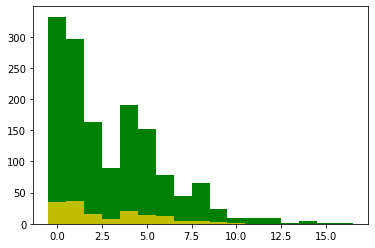

Bowler's Economy  :  2.9619823489477257
Bowlership's Economy  :  2.7254901960784315


Bowler's Skew     :  1.09839943894017
Bowlership's Skew :  0.9274017922978338
Bowler's Kurtosis     :  1.1687417630677421
Bowlership's Kurtosis :  -0.44841827193740125


Greater : Statistics=127.00, p=0.06 
Two-Sided : Statistics=127.00, p=0.12 
Less : Statistics=127.00, p=0.95 

____________________________________________


JO Holder AS Joseph


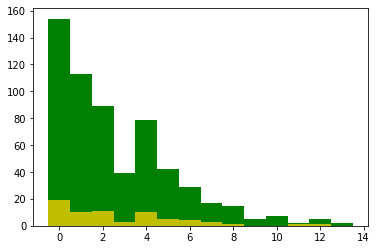

Bowler's Economy  :  2.6254180602006687
Bowlership's Economy  :  2.676470588235294


Bowler's Skew     :  1.231394015035945
Bowlership's Skew :  1.0455439035683354
Bowler's Kurtosis     :  1.388960443324918
Bowlership's Kurtosis :  0.1877117788158067


Greater : Statistics=123.00, p=0.01 
Two-Sided : Statistics=123.00, p=0.01 
Less : Statistics=123.00, p=0.99 

____________________________________________


JO Holder KAJ Roach


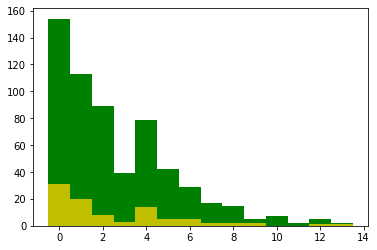

Bowler's Economy  :  2.6254180602006687
Bowlership's Economy  :  2.4361702127659575


Bowler's Skew     :  1.231394015035945
Bowlership's Skew :  1.5285283558743792
Bowler's Kurtosis     :  1.388960443324918
Bowlership's Kurtosis :  1.1857956181687976


Greater : Statistics=132.00, p=0.01 
Two-Sided : Statistics=132.00, p=0.01 
Less : Statistics=132.00, p=0.99 

JO Holder - KAJ Roach better than JO Holder
____________________________________________


JO Holder ST Gabriel


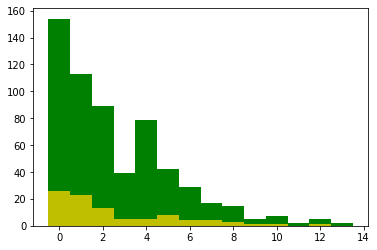

Bowler's Economy  :  2.6254180602006687
Bowlership's Economy  :  2.4574468085106385


Bowler's Skew     :  1.231394015035945
Bowlership's Skew :  1.2955586929278806
Bowler's Kurtosis     :  1.388960443324918
Bowlership's Kurtosis :  0.2259400126610962


Greater : Statistics=132.00, p=0.01 
Two-Sided : Statistics=132.00, p=0.01 
Less : Statistics=132.00, p=0.99 

JO Holder - ST Gabriel better than JO Holder
____________________________________________


JO Holder RL Chase


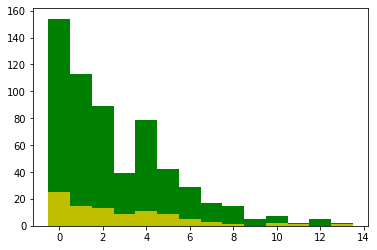

Bowler's Economy  :  2.6254180602006687
Bowlership's Economy  :  2.736842105263158


Bowler's Skew     :  1.231394015035945
Bowlership's Skew :  1.0033938531300803
Bowler's Kurtosis     :  1.388960443324918
Bowlership's Kurtosis :  0.34028038624580326


Greater : Statistics=129.50, p=0.01 
Two-Sided : Statistics=129.50, p=0.02 
Less : Statistics=129.50, p=0.99 

____________________________________________


JR Hazlewood PJ Cummins


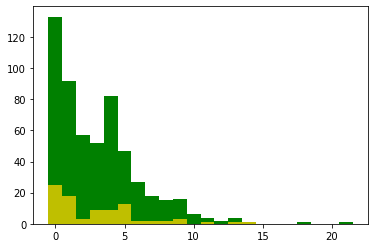

Bowler's Economy  :  3.064516129032258
Bowlership's Economy  :  2.9101123595505616


Bowler's Skew     :  1.4295600730930056
Bowlership's Skew :  1.2687772639734336
Bowler's Kurtosis     :  3.266674746254706
Bowlership's Kurtosis :  0.4433974448074318


Greater : Statistics=157.50, p=0.03 
Two-Sided : Statistics=157.50, p=0.05 
Less : Statistics=157.50, p=0.98 

____________________________________________


JR Hazlewood MA Starc


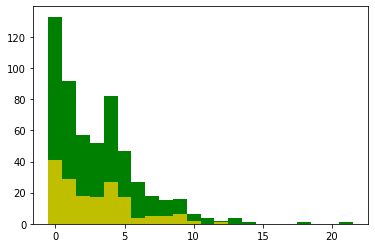

Bowler's Economy  :  3.064516129032258
Bowlership's Economy  :  2.872093023255814


Bowler's Skew     :  1.4295600730930056
Bowlership's Skew :  0.7601270463694324
Bowler's Kurtosis     :  3.266674746254706
Bowlership's Kurtosis :  -0.5256568910359021


Greater : Statistics=115.50, p=0.28 
Two-Sided : Statistics=115.50, p=0.56 
Less : Statistics=115.50, p=0.73 

____________________________________________


JR Hazlewood NM Lyon


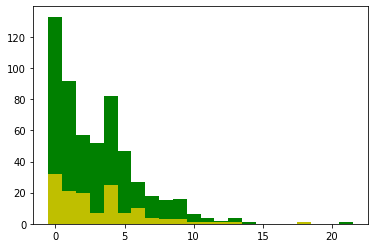

Bowler's Economy  :  3.064516129032258
Bowlership's Economy  :  3.065693430656934


Bowler's Skew     :  1.4295600730930056
Bowlership's Skew :  1.0657350302986361
Bowler's Kurtosis     :  3.266674746254706
Bowlership's Kurtosis :  -0.2724163184670769


Greater : Statistics=172.50, p=0.05 
Two-Sided : Statistics=172.50, p=0.09 
Less : Statistics=172.50, p=0.96 

____________________________________________


K Rabada KA Maharaj


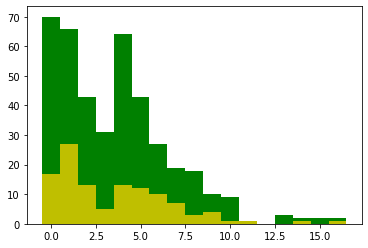

Bowler's Economy  :  3.597560975609756
Bowlership's Economy  :  3.4782608695652173


Bowler's Skew     :  1.1013568340912656
Bowlership's Skew :  1.0451320168092437
Bowler's Kurtosis     :  1.485405838315038
Bowlership's Kurtosis :  0.4996502993341365


Greater : Statistics=158.50, p=0.03 
Two-Sided : Statistics=158.50, p=0.06 
Less : Statistics=158.50, p=0.98 

____________________________________________


K Rabada VD Philander


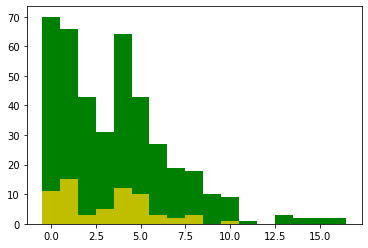

Bowler's Economy  :  3.597560975609756
Bowlership's Economy  :  3.076923076923077


Bowler's Skew     :  1.1013568340912656
Bowlership's Skew :  0.4935541243349484
Bowler's Kurtosis     :  1.485405838315038
Bowlership's Kurtosis :  -1.3183367145996299


Greater : Statistics=111.00, p=0.05 
Two-Sided : Statistics=111.00, p=0.11 
Less : Statistics=111.00, p=0.95 

____________________________________________


KA Maharaj K Rabada


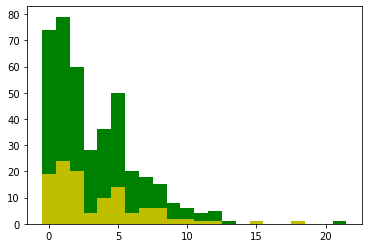

Bowler's Economy  :  3.307125307125307
Bowlership's Economy  :  3.4260869565217393


Bowler's Skew     :  1.4441161297641225
Bowlership's Skew :  0.9550597021899392
Bowler's Kurtosis     :  3.2018022590930757
Bowlership's Kurtosis :  -0.5516985397030965


Greater : Statistics=169.50, p=0.06 
Two-Sided : Statistics=169.50, p=0.11 
Less : Statistics=169.50, p=0.95 

____________________________________________


KA Maharaj VD Philander


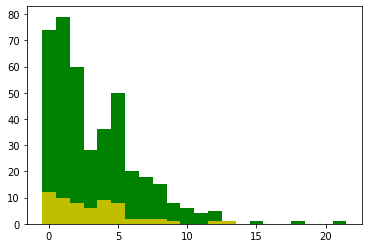

Bowler's Economy  :  3.307125307125307
Bowlership's Economy  :  3.161290322580645


Bowler's Skew     :  1.4441161297641225
Bowlership's Skew :  0.30911166292623127
Bowler's Kurtosis     :  3.2018022590930757
Bowlership's Kurtosis :  -1.478433865501102


Greater : Statistics=140.50, p=0.04 
Two-Sided : Statistics=140.50, p=0.09 
Less : Statistics=140.50, p=0.96 

____________________________________________


KAJ Roach JO Holder


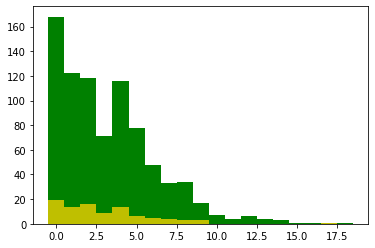

Bowler's Economy  :  3.2593037214885956
Bowlership's Economy  :  3.0319148936170213


Bowler's Skew     :  1.2214823194089435
Bowlership's Skew :  0.4234382465342431
Bowler's Kurtosis     :  1.9833749242116987
Bowlership's Kurtosis :  -1.3055350624291224


Greater : Statistics=131.50, p=0.13 
Two-Sided : Statistics=131.50, p=0.25 
Less : Statistics=131.50, p=0.88 

____________________________________________


KAJ Roach JE Taylor


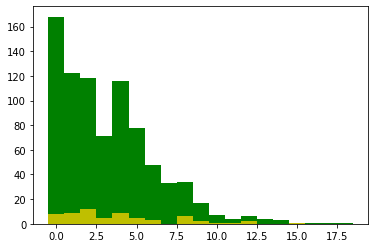

Bowler's Economy  :  3.2593037214885956
Bowlership's Economy  :  3.953125


Bowler's Skew     :  1.2214823194089435
Bowlership's Skew :  0.49832415970731403
Bowler's Kurtosis     :  1.9833749242116987
Bowlership's Kurtosis :  -0.9808923368271736


Greater : Statistics=171.00, p=0.03 
Two-Sided : Statistics=171.00, p=0.07 
Less : Statistics=171.00, p=0.97 

____________________________________________


KAJ Roach SJ Benn


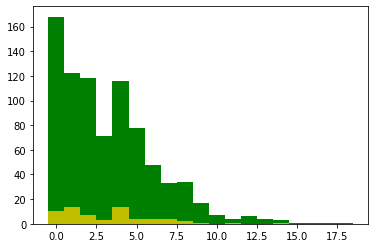

Bowler's Economy  :  3.2593037214885956
Bowlership's Economy  :  3.3076923076923075


Bowler's Skew     :  1.2214823194089435
Bowlership's Skew :  0.8991231297777905
Bowler's Kurtosis     :  1.9833749242116987
Bowlership's Kurtosis :  -0.6311714239962676


Greater : Statistics=160.00, p=0.03 
Two-Sided : Statistics=160.00, p=0.06 
Less : Statistics=160.00, p=0.97 

____________________________________________


KAJ Roach ST Gabriel


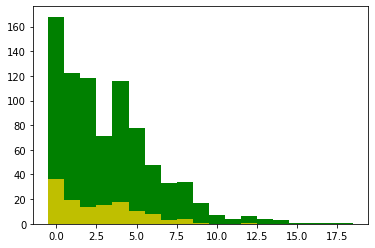

Bowler's Economy  :  3.2593037214885956
Bowlership's Economy  :  2.604651162790698


Bowler's Skew     :  1.2214823194089435
Bowlership's Skew :  1.0581963656826823
Bowler's Kurtosis     :  1.9833749242116987
Bowlership's Kurtosis :  0.6546436213746465


Greater : Statistics=126.50, p=0.18 
Two-Sided : Statistics=126.50, p=0.35 
Less : Statistics=126.50, p=0.83 

____________________________________________


M Morkel DW Steyn


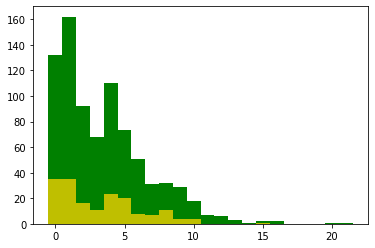

Bowler's Economy  :  3.507917174177832
Bowlership's Economy  :  3.2457142857142856


Bowler's Skew     :  1.2493712922477027
Bowlership's Skew :  0.7423033721505558
Bowler's Kurtosis     :  2.199337334678619
Bowlership's Kurtosis :  -0.6813934535376958


Greater : Statistics=133.00, p=0.23 
Two-Sided : Statistics=133.00, p=0.45 
Less : Statistics=133.00, p=0.79 

____________________________________________


M Morkel JH Kallis


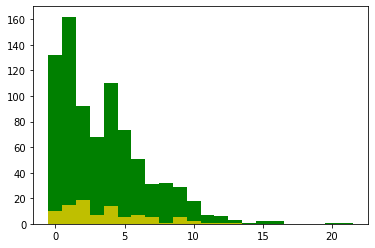

Bowler's Economy  :  3.507917174177832
Bowlership's Economy  :  3.6666666666666665


Bowler's Skew     :  1.2493712922477027
Bowlership's Skew :  0.8263344562449355
Bowler's Kurtosis     :  2.199337334678619
Bowlership's Kurtosis :  -0.4718775193667142


Greater : Statistics=190.00, p=0.02 
Two-Sided : Statistics=190.00, p=0.04 
Less : Statistics=190.00, p=0.98 

____________________________________________


M Morkel VD Philander


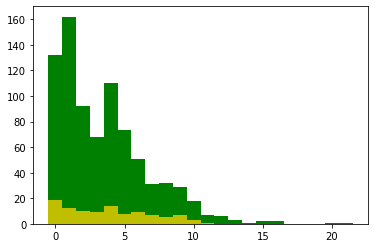

Bowler's Economy  :  3.507917174177832
Bowlership's Economy  :  3.8653846153846154


Bowler's Skew     :  1.2493712922477027
Bowlership's Skew :  0.5022006295073562
Bowler's Kurtosis     :  2.199337334678619
Bowlership's Kurtosis :  0.052449782123499045


Greater : Statistics=143.00, p=0.12 
Two-Sided : Statistics=143.00, p=0.25 
Less : Statistics=143.00, p=0.88 

____________________________________________


M Morkel PL Harris


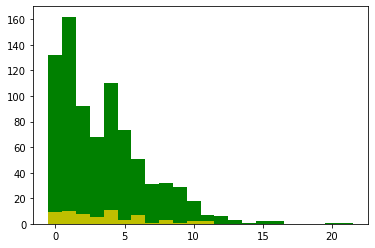

Bowler's Economy  :  3.507917174177832
Bowlership's Economy  :  3.6129032258064515


Bowler's Skew     :  1.2493712922477027
Bowlership's Skew :  0.3245363402321723
Bowler's Kurtosis     :  2.199337334678619
Bowlership's Kurtosis :  -1.4352684599666752


Greater : Statistics=160.50, p=0.03 
Two-Sided : Statistics=160.50, p=0.06 
Less : Statistics=160.50, p=0.97 

____________________________________________


M Muralitharan WPUJC Vaas


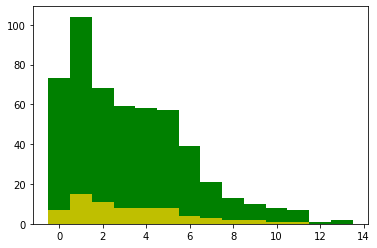

Bowler's Economy  :  3.276923076923077
Bowlership's Economy  :  3.3285714285714287


Bowler's Skew     :  0.9102210387800224
Bowlership's Skew :  0.6354126549968845
Bowler's Kurtosis     :  0.4608697307463854
Bowlership's Kurtosis :  -0.5186173125552163


Greater : Statistics=136.00, p=0.00 
Two-Sided : Statistics=136.00, p=0.01 
Less : Statistics=136.00, p=1.00 

____________________________________________


M Muralitharan SL Malinga


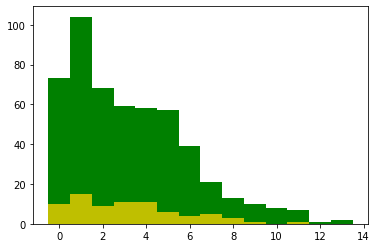

Bowler's Economy  :  3.276923076923077
Bowlership's Economy  :  3.1973684210526314


Bowler's Skew     :  0.9102210387800224
Bowlership's Skew :  0.2171352934451665
Bowler's Kurtosis     :  0.4608697307463854
Bowlership's Kurtosis :  -1.0925579667063021


Greater : Statistics=120.50, p=0.01 
Two-Sided : Statistics=120.50, p=0.02 
Less : Statistics=120.50, p=0.99 

M Muralitharan - SL Malinga better than M Muralitharan
____________________________________________


M Muralitharan MF Maharoof


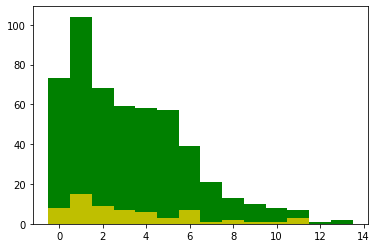

Bowler's Economy  :  3.276923076923077
Bowlership's Economy  :  3.3333333333333335


Bowler's Skew     :  0.9102210387800224
Bowlership's Skew :  0.8986371541798296
Bowler's Kurtosis     :  0.4608697307463854
Bowlership's Kurtosis :  0.19134959266851093


Greater : Statistics=140.50, p=0.00 
Two-Sided : Statistics=140.50, p=0.00 
Less : Statistics=140.50, p=1.00 

____________________________________________


M Muralitharan CRD Fernando


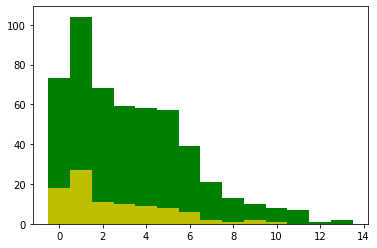

Bowler's Economy  :  3.276923076923077
Bowlership's Economy  :  2.536842105263158


Bowler's Skew     :  0.9102210387800224
Bowlership's Skew :  1.1219827105562332
Bowler's Kurtosis     :  0.4608697307463854
Bowlership's Kurtosis :  0.49960889709378353


Greater : Statistics=118.00, p=0.01 
Two-Sided : Statistics=118.00, p=0.03 
Less : Statistics=118.00, p=0.99 

M Muralitharan - CRD Fernando better than M Muralitharan
____________________________________________


M Ntini DW Steyn


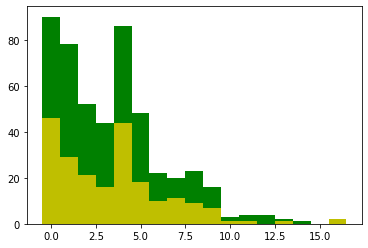

Bowler's Economy  :  3.418181818181818
Bowlership's Economy  :  3.3472222222222223


Bowler's Skew     :  1.0375023009096127
Bowlership's Skew :  0.9870728900016842
Bowler's Kurtosis     :  1.19180670763859
Bowlership's Kurtosis :  -0.1719380367953498


Greater : Statistics=143.50, p=0.10 
Two-Sided : Statistics=143.50, p=0.20 
Less : Statistics=143.50, p=0.91 

____________________________________________


MA Starc JR Hazlewood


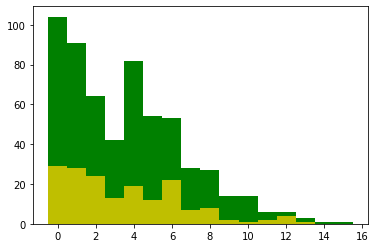

Bowler's Economy  :  3.635593220338983
Bowlership's Economy  :  3.5290697674418605


Bowler's Skew     :  0.7964748011733142
Bowlership's Skew :  0.40154384265062226
Bowler's Kurtosis     :  0.16425481786949314
Bowlership's Kurtosis :  -1.3249979175010318


Greater : Statistics=156.50, p=0.03 
Two-Sided : Statistics=156.50, p=0.07 
Less : Statistics=156.50, p=0.97 

____________________________________________


MA Starc NM Lyon


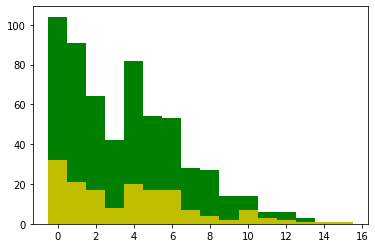

Bowler's Economy  :  3.635593220338983
Bowlership's Economy  :  3.8375


Bowler's Skew     :  0.7964748011733142
Bowlership's Skew :  0.839188701738596
Bowler's Kurtosis     :  0.16425481786949314
Bowlership's Kurtosis :  -0.3058963197467355


Greater : Statistics=184.50, p=0.02 
Two-Sided : Statistics=184.50, p=0.03 
Less : Statistics=184.50, p=0.98 

____________________________________________


MDK Perera RAS Lakmal


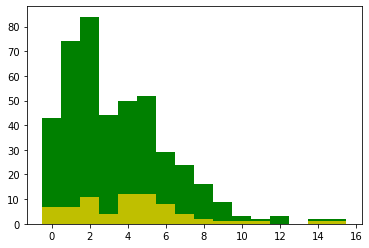

Bowler's Economy  :  3.5034324942791764
Bowlership's Economy  :  4.166666666666667


Bowler's Skew     :  1.1049836925520082
Bowlership's Skew :  0.49022988548541463
Bowler's Kurtosis     :  1.5704650364678647
Bowlership's Kurtosis :  -1.2596281206512072


Greater : Statistics=165.50, p=0.00 
Two-Sided : Statistics=165.50, p=0.01 
Less : Statistics=165.50, p=1.00 

____________________________________________


MDK Perera HMRKB Herath


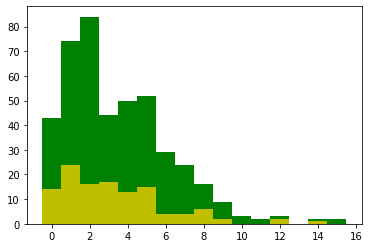

Bowler's Economy  :  3.5034324942791764
Bowlership's Economy  :  3.305084745762712


Bowler's Skew     :  1.1049836925520082
Bowlership's Skew :  0.34891668469588294
Bowler's Kurtosis     :  1.5704650364678647
Bowlership's Kurtosis :  -1.1228615933320722


Greater : Statistics=123.00, p=0.06 
Two-Sided : Statistics=123.00, p=0.11 
Less : Statistics=123.00, p=0.95 

____________________________________________


MG Johnson NM Lyon


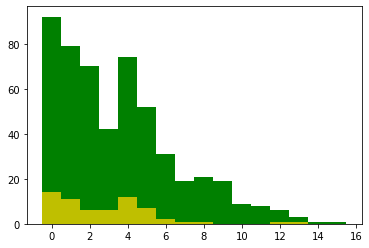

Bowler's Economy  :  3.5616698292220113
Bowlership's Economy  :  2.838709677419355


Bowler's Skew     :  0.936570642054596
Bowlership's Skew :  0.49156426810954934
Bowler's Kurtosis     :  0.42085665512861103
Bowlership's Kurtosis :  -1.2154186441520423


Greater : Statistics=141.00, p=0.00 
Two-Sided : Statistics=141.00, p=0.01 
Less : Statistics=141.00, p=1.00 

MG Johnson - NM Lyon better than MG Johnson
____________________________________________


MM Ali BA Stokes


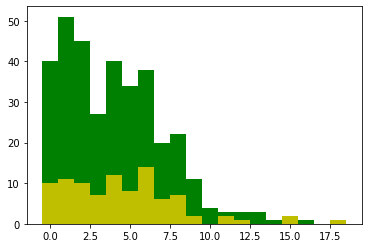

Bowler's Economy  :  4.106936416184971
Bowlership's Economy  :  4.537634408602151


Bowler's Skew     :  0.9821910011570596
Bowlership's Skew :  0.0487136665736472
Bowler's Kurtosis     :  1.2222707615195265
Bowlership's Kurtosis :  -1.324907888555904


Greater : Statistics=164.00, p=0.08 
Two-Sided : Statistics=164.00, p=0.15 
Less : Statistics=164.00, p=0.93 

____________________________________________


MM Ali SCJ Broad


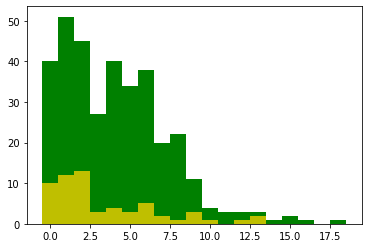

Bowler's Economy  :  4.106936416184971
Bowlership's Economy  :  3.4166666666666665


Bowler's Skew     :  0.9821910011570596
Bowlership's Skew :  1.0949733310480334
Bowler's Kurtosis     :  1.2222707615195265
Bowlership's Kurtosis :  -0.3629311032928699


Greater : Statistics=164.50, p=0.03 
Two-Sided : Statistics=164.50, p=0.06 
Less : Statistics=164.50, p=0.97 

____________________________________________


MS Panesar SCJ Broad


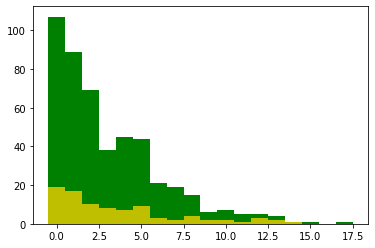

Bowler's Economy  :  3.0545073375262053
Bowlership's Economy  :  3.588888888888889


Bowler's Skew     :  1.3444472213083696
Bowlership's Skew :  1.2170818669608747
Bowler's Kurtosis     :  1.7859593495279835
Bowlership's Kurtosis :  0.31890581717451516


Greater : Statistics=180.50, p=0.02 
Two-Sided : Statistics=180.50, p=0.05 
Less : Statistics=180.50, p=0.98 

____________________________________________


MS Panesar JM Anderson


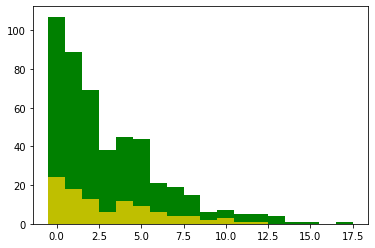

Bowler's Economy  :  3.0545073375262053
Bowlership's Economy  :  3.1262135922330097


Bowler's Skew     :  1.3444472213083696
Bowlership's Skew :  1.0513921528610957
Bowler's Kurtosis     :  1.7859593495279835
Bowlership's Kurtosis :  0.10016088319693717


Greater : Statistics=148.00, p=0.06 
Two-Sided : Statistics=148.00, p=0.12 
Less : Statistics=148.00, p=0.94 

____________________________________________


MS Panesar GP Swann


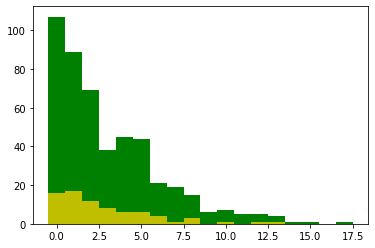

Bowler's Economy  :  3.0545073375262053
Bowlership's Economy  :  2.75


Bowler's Skew     :  1.3444472213083696
Bowlership's Skew :  0.7930016651796042
Bowler's Kurtosis     :  1.7859593495279835
Bowlership's Kurtosis :  -0.7443428560456473


Greater : Statistics=144.50, p=0.03 
Two-Sided : Statistics=144.50, p=0.06 
Less : Statistics=144.50, p=0.97 

____________________________________________


Mohammad Amir Yasir Shah


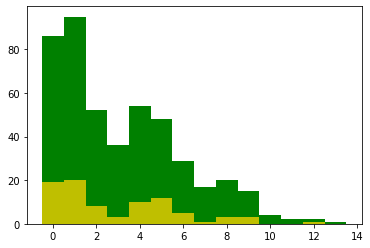

Bowler's Economy  :  3.1453362255965294
Bowlership's Economy  :  2.8823529411764706


Bowler's Skew     :  0.8144128006052462
Bowlership's Skew :  0.7989349867614403
Bowler's Kurtosis     :  -0.02490678658450518
Bowlership's Kurtosis :  -0.7302085336143547


Greater : Statistics=115.50, p=0.02 
Two-Sided : Statistics=115.50, p=0.04 
Less : Statistics=115.50, p=0.98 

Mohammad Amir - Yasir Shah better than Mohammad Amir
____________________________________________


Mohammad Amir Mohammad Asif


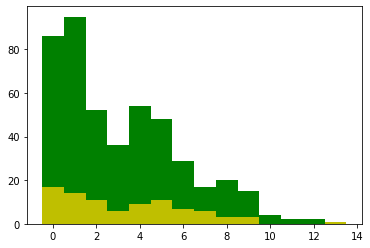

Bowler's Economy  :  3.1453362255965294
Bowlership's Economy  :  3.3295454545454546


Bowler's Skew     :  0.8144128006052462
Bowlership's Skew :  0.3393721580439103
Bowler's Kurtosis     :  -0.02490678658450518
Bowlership's Kurtosis :  -0.8375436710561681


Greater : Statistics=114.00, p=0.02 
Two-Sided : Statistics=114.00, p=0.05 
Less : Statistics=114.00, p=0.98 

____________________________________________


Mohammad Asif Umar Gul


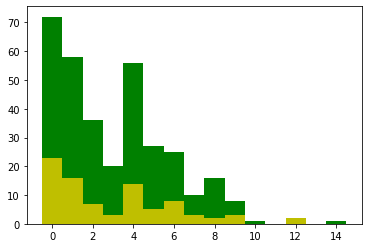

Bowler's Economy  :  3.0632530120481927
Bowlership's Economy  :  2.9767441860465116


Bowler's Skew     :  0.8142914069493356
Bowlership's Skew :  1.1078672160986263
Bowler's Kurtosis     :  0.2799334862141527
Bowlership's Kurtosis :  -0.010775022690671321


Greater : Statistics=102.00, p=0.04 
Two-Sided : Statistics=102.00, p=0.08 
Less : Statistics=102.00, p=0.96 

____________________________________________


Mohammad Asif Mohammad Amir


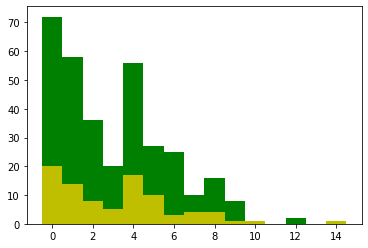

Bowler's Economy  :  3.0632530120481927
Bowlership's Economy  :  3.1136363636363638


Bowler's Skew     :  0.8142914069493356
Bowlership's Skew :  0.7823705749293015
Bowler's Kurtosis     :  0.2799334862141527
Bowlership's Kurtosis :  -0.7464475482463016


Greater : Statistics=115.50, p=0.02 
Two-Sided : Statistics=115.50, p=0.04 
Less : Statistics=115.50, p=0.98 

____________________________________________


Mohammed Shami R Ashwin


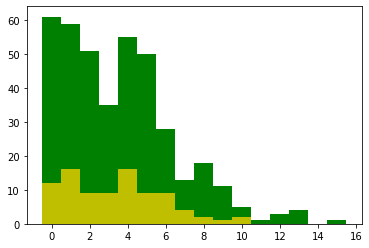

Bowler's Economy  :  3.5493670886075948
Bowlership's Economy  :  3.337078651685393


Bowler's Skew     :  0.9143146645637975
Bowlership's Skew :  0.12089050180975101
Bowler's Kurtosis     :  0.7637419613230203
Bowlership's Kurtosis :  -1.1538925647803764


Greater : Statistics=116.50, p=0.04 
Two-Sided : Statistics=116.50, p=0.08 
Less : Statistics=116.50, p=0.96 

____________________________________________


Mohammed Shami I Sharma


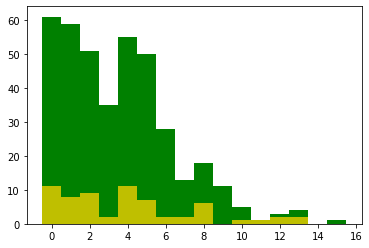

Bowler's Economy  :  3.5493670886075948
Bowlership's Economy  :  4.0


Bowler's Skew     :  0.9143146645637975
Bowlership's Skew :  0.46746394242048706
Bowler's Kurtosis     :  0.7637419613230203
Bowlership's Kurtosis :  -1.3951254982185748


Greater : Statistics=152.00, p=0.01 
Two-Sided : Statistics=152.00, p=0.01 
Less : Statistics=152.00, p=0.99 

____________________________________________


N Pradeep RAS Lakmal


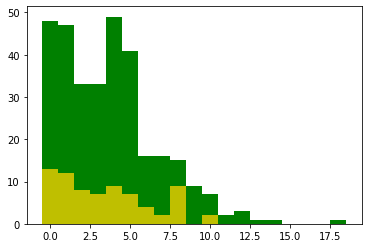

Bowler's Economy  :  3.7111801242236027
Bowlership's Economy  :  3.4246575342465753


Bowler's Skew     :  0.9827600199585923
Bowlership's Skew :  -0.07537894229199431
Bowler's Kurtosis     :  1.314554378405342
Bowlership's Kurtosis :  -1.015055202408833


Greater : Statistics=104.00, p=0.11 
Two-Sided : Statistics=104.00, p=0.21 
Less : Statistics=104.00, p=0.90 

____________________________________________


N Pradeep HMRKB Herath


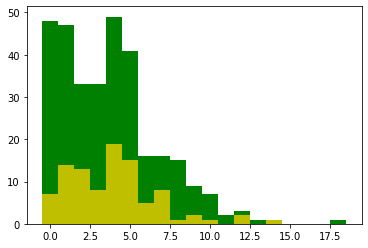

Bowler's Economy  :  3.7111801242236027
Bowlership's Economy  :  3.90625


Bowler's Skew     :  0.9827600199585923
Bowlership's Skew :  0.5085133255918418
Bowler's Kurtosis     :  1.314554378405342
Bowlership's Kurtosis :  -1.0430866478227303


Greater : Statistics=142.50, p=0.05 
Two-Sided : Statistics=142.50, p=0.09 
Less : Statistics=142.50, p=0.96 

____________________________________________


N Wagner C de Grandhomme


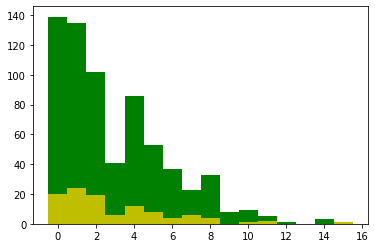

Bowler's Economy  :  2.964497041420118
Bowlership's Economy  :  2.925233644859813


Bowler's Skew     :  1.0997198566463358
Bowlership's Skew :  0.7908082667919044
Bowler's Kurtosis     :  1.0092198832710384
Bowlership's Kurtosis :  -0.8325569265954784


Greater : Statistics=132.50, p=0.02 
Two-Sided : Statistics=132.50, p=0.04 
Less : Statistics=132.50, p=0.98 

N Wagner - C de Grandhomme better than N Wagner
____________________________________________


N Wagner TG Southee


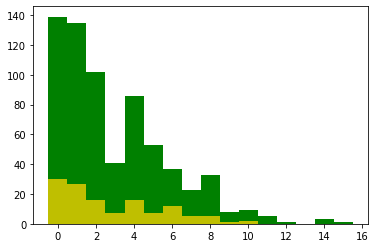

Bowler's Economy  :  2.964497041420118
Bowlership's Economy  :  2.7734375


Bowler's Skew     :  1.0997198566463358
Bowlership's Skew :  0.8064354905228367
Bowler's Kurtosis     :  1.0092198832710384
Bowlership's Kurtosis :  -0.5990372629490253


Greater : Statistics=115.00, p=0.05 
Two-Sided : Statistics=115.00, p=0.10 
Less : Statistics=115.00, p=0.96 

____________________________________________


N Wagner TA Boult


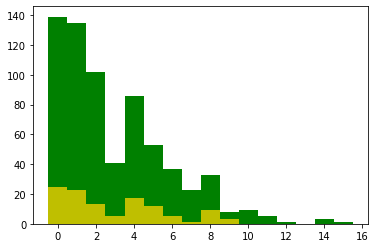

Bowler's Economy  :  2.964497041420118
Bowlership's Economy  :  2.9026548672566372


Bowler's Skew     :  1.0997198566463358
Bowlership's Skew :  0.44780062080996164
Bowler's Kurtosis     :  1.0092198832710384
Bowlership's Kurtosis :  -1.0700789789433438


Greater : Statistics=102.50, p=0.07 
Two-Sided : Statistics=102.50, p=0.13 
Less : Statistics=102.50, p=0.94 

____________________________________________


N Wagner MJ Santner


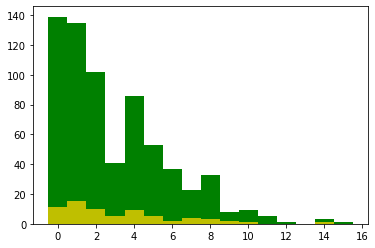

Bowler's Economy  :  2.964497041420118
Bowlership's Economy  :  3.1911764705882355


Bowler's Skew     :  1.0997198566463358
Bowlership's Skew :  0.7685440344126442
Bowler's Kurtosis     :  1.0092198832710384
Bowlership's Kurtosis :  -0.6077854671280276


Greater : Statistics=138.00, p=0.01 
Two-Sided : Statistics=138.00, p=0.02 
Less : Statistics=138.00, p=0.99 

____________________________________________


NM Lyon MA Starc


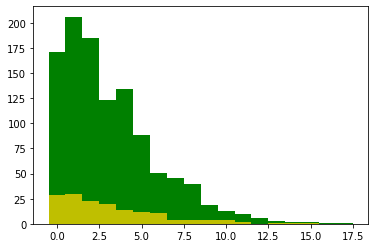

Bowler's Economy  :  3.162579473206176
Bowlership's Economy  :  3.2375


Bowler's Skew     :  1.257455355303623
Bowlership's Skew :  0.7750064750293086
Bowler's Kurtosis     :  1.8133272115832737
Bowlership's Kurtosis :  -0.8313821829204997


Greater : Statistics=186.00, p=0.03 
Two-Sided : Statistics=186.00, p=0.07 
Less : Statistics=186.00, p=0.97 

____________________________________________


NM Lyon MG Johnson


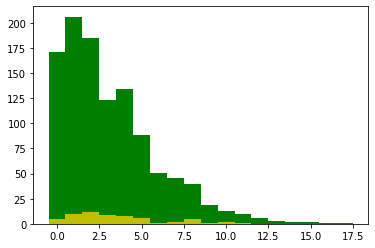

Bowler's Economy  :  3.162579473206176
Bowlership's Economy  :  3.596774193548387


Bowler's Skew     :  1.257455355303623
Bowlership's Skew :  0.37545573937779203
Bowler's Kurtosis     :  1.8133272115832737
Bowlership's Kurtosis :  -1.201972397766883


Greater : Statistics=166.00, p=0.01 
Two-Sided : Statistics=166.00, p=0.01 
Less : Statistics=166.00, p=0.99 

____________________________________________


NM Lyon PM Siddle


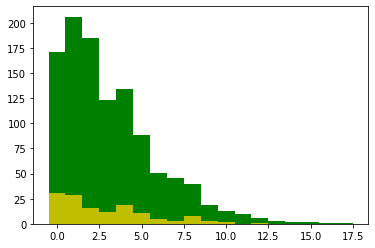

Bowler's Economy  :  3.162579473206176
Bowlership's Economy  :  2.8714285714285714


Bowler's Skew     :  1.257455355303623
Bowlership's Skew :  0.7990919895707767
Bowler's Kurtosis     :  1.8133272115832737
Bowlership's Kurtosis :  -0.6179364636815077


Greater : Statistics=143.50, p=0.07 
Two-Sided : Statistics=143.50, p=0.14 
Less : Statistics=143.50, p=0.94 

____________________________________________


NM Lyon PJ Cummins


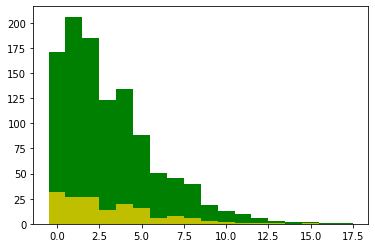

Bowler's Economy  :  3.162579473206176
Bowlership's Economy  :  3.1575757575757577


Bowler's Skew     :  1.257455355303623
Bowlership's Skew :  0.7260118655139832
Bowler's Kurtosis     :  1.8133272115832737
Bowlership's Kurtosis :  -0.9352722007280057


Greater : Statistics=189.50, p=0.03 
Two-Sided : Statistics=189.50, p=0.05 
Less : Statistics=189.50, p=0.98 

____________________________________________


NM Lyon JR Hazlewood


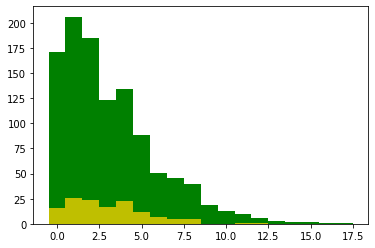

Bowler's Economy  :  3.162579473206176
Bowlership's Economy  :  3.0437956204379564


Bowler's Skew     :  1.257455355303623
Bowlership's Skew :  0.17461886733718018
Bowler's Kurtosis     :  1.8133272115832737
Bowlership's Kurtosis :  -1.4424805619354877


Greater : Statistics=130.00, p=0.08 
Two-Sided : Statistics=130.00, p=0.17 
Less : Statistics=130.00, p=0.92 

____________________________________________


PJ Cummins NM Lyon


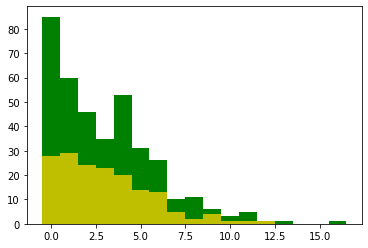

Bowler's Economy  :  2.9893048128342246
Bowlership's Economy  :  2.993939393939394


Bowler's Skew     :  1.1098931732003292
Bowlership's Skew :  0.2437329762487278
Bowler's Kurtosis     :  1.3979744228870308
Bowlership's Kurtosis :  -1.547750601041009


Greater : Statistics=121.00, p=0.14 
Two-Sided : Statistics=121.00, p=0.29 
Less : Statistics=121.00, p=0.87 

____________________________________________


PJ Cummins JR Hazlewood


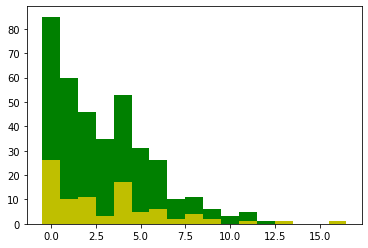

Bowler's Economy  :  2.9893048128342246
Bowlership's Economy  :  3.0786516853932584


Bowler's Skew     :  1.1098931732003292
Bowlership's Skew :  1.497594636573354
Bowler's Kurtosis     :  1.3979744228870308
Bowlership's Kurtosis :  1.3114711784602147


Greater : Statistics=136.50, p=0.04 
Two-Sided : Statistics=136.50, p=0.07 
Less : Statistics=136.50, p=0.97 

____________________________________________


PM Siddle BW Hilfenhaus


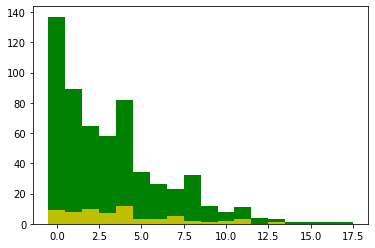

Bowler's Economy  :  3.2687074829931975
Bowlership's Economy  :  3.878787878787879


Bowler's Skew     :  1.1479732126776703
Bowlership's Skew :  0.5497491044138099
Bowler's Kurtosis     :  1.1183378434092006
Bowlership's Kurtosis :  -1.0902257601915788


Greater : Statistics=167.50, p=0.02 
Two-Sided : Statistics=167.50, p=0.04 
Less : Statistics=167.50, p=0.98 

____________________________________________


PM Siddle NM Lyon


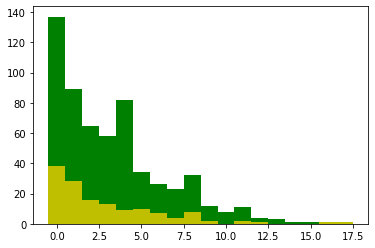

Bowler's Economy  :  3.2687074829931975
Bowlership's Economy  :  2.8857142857142857


Bowler's Skew     :  1.1479732126776703
Bowlership's Skew :  1.4718244545730503
Bowler's Kurtosis     :  1.1183378434092006
Bowlership's Kurtosis :  1.2397552993449787


Greater : Statistics=164.00, p=0.08 
Two-Sided : Statistics=164.00, p=0.15 
Less : Statistics=164.00, p=0.93 

____________________________________________


PP Ojha Harbhajan Singh


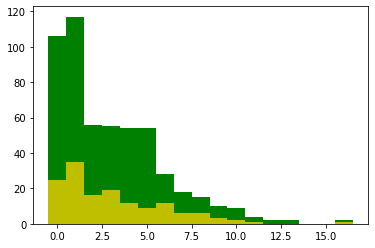

Bowler's Economy  :  3.007518796992481
Bowlership's Economy  :  3.0816326530612246


Bowler's Skew     :  1.213670997107861
Bowlership's Skew :  1.0102958834620053
Bowler's Kurtosis     :  1.5861665857962963
Bowlership's Kurtosis :  0.19519097680433628


Greater : Statistics=134.00, p=0.05 
Two-Sided : Statistics=134.00, p=0.10 
Less : Statistics=134.00, p=0.96 

____________________________________________


PP Ojha I Sharma


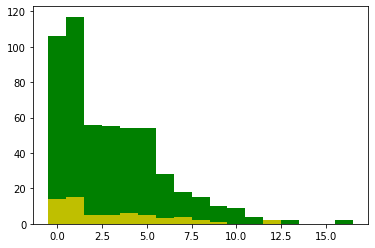

Bowler's Economy  :  3.007518796992481
Bowlership's Economy  :  2.967741935483871


Bowler's Skew     :  1.213670997107861
Bowlership's Skew :  1.235195655514555
Bowler's Kurtosis     :  1.5861665857962963
Bowlership's Kurtosis :  0.15470457482335132


Greater : Statistics=127.00, p=0.01 
Two-Sided : Statistics=127.00, p=0.02 
Less : Statistics=127.00, p=0.99 

PP Ojha - I Sharma better than PP Ojha
____________________________________________


PP Ojha R Ashwin


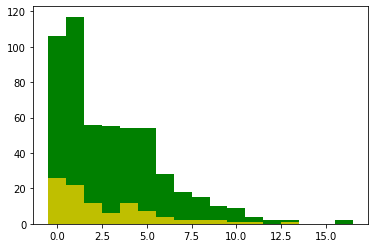

Bowler's Economy  :  3.007518796992481
Bowlership's Economy  :  2.5816326530612246


Bowler's Skew     :  1.213670997107861
Bowlership's Skew :  1.2316328174449602
Bowler's Kurtosis     :  1.5861665857962963
Bowlership's Kurtosis :  0.2292154632674226


Greater : Statistics=151.00, p=0.01 
Two-Sided : Statistics=151.00, p=0.01 
Less : Statistics=151.00, p=0.99 

PP Ojha - R Ashwin better than PP Ojha
____________________________________________


R Ashwin Mohammed Shami


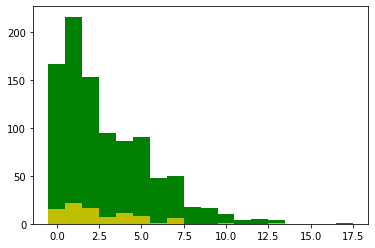

Bowler's Economy  :  2.909751037344398
Bowlership's Economy  :  2.606741573033708


Bowler's Skew     :  1.1948594828076198
Bowlership's Skew :  0.4540219952008473
Bowler's Kurtosis     :  1.5022446321067662
Bowlership's Kurtosis :  -0.953820923489094


Greater : Statistics=113.50, p=0.02 
Two-Sided : Statistics=113.50, p=0.03 
Less : Statistics=113.50, p=0.98 

R Ashwin - Mohammed Shami better than R Ashwin
____________________________________________


R Ashwin PP Ojha


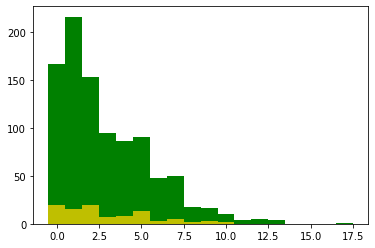

Bowler's Economy  :  2.909751037344398
Bowlership's Economy  :  2.9489795918367347


Bowler's Skew     :  1.1948594828076198
Bowlership's Skew :  0.5849453040262726
Bowler's Kurtosis     :  1.5022446321067662
Bowlership's Kurtosis :  -1.1679623427274066


Greater : Statistics=125.50, p=0.01 
Two-Sided : Statistics=125.50, p=0.03 
Less : Statistics=125.50, p=0.99 

____________________________________________


R Ashwin I Sharma


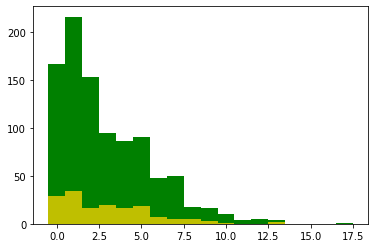

Bowler's Economy  :  2.909751037344398
Bowlership's Economy  :  2.9556962025316458


Bowler's Skew     :  1.1948594828076198
Bowlership's Skew :  0.570565544795646
Bowler's Kurtosis     :  1.5022446321067662
Bowlership's Kurtosis :  -0.892383300524306


Greater : Statistics=127.00, p=0.04 
Two-Sided : Statistics=127.00, p=0.07 
Less : Statistics=127.00, p=0.97 

____________________________________________


R Ashwin UT Yadav


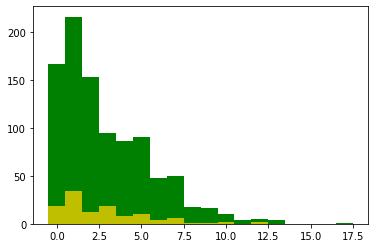

Bowler's Economy  :  2.909751037344398
Bowlership's Economy  :  2.7457627118644066


Bowler's Skew     :  1.1948594828076198
Bowlership's Skew :  1.2615932956439377
Bowler's Kurtosis     :  1.5022446321067662
Bowlership's Kurtosis :  0.8172578081553894


Greater : Statistics=136.50, p=0.01 
Two-Sided : Statistics=136.50, p=0.02 
Less : Statistics=136.50, p=0.99 

R Ashwin - UT Yadav better than R Ashwin
____________________________________________


R Ashwin RA Jadeja


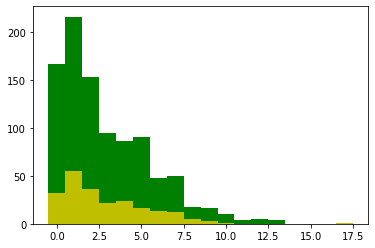

Bowler's Economy  :  2.909751037344398
Bowlership's Economy  :  2.840909090909091


Bowler's Skew     :  1.1948594828076198
Bowlership's Skew :  0.8699506165838904
Bowler's Kurtosis     :  1.5022446321067662
Bowlership's Kurtosis :  -0.00572952000692073


Greater : Statistics=122.00, p=0.06 
Two-Sided : Statistics=122.00, p=0.12 
Less : Statistics=122.00, p=0.94 

____________________________________________


RA Jadeja I Sharma


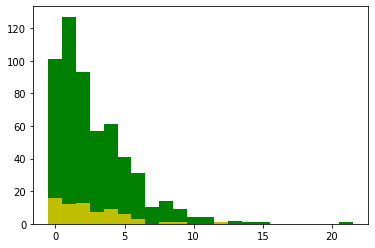

Bowler's Economy  :  2.78494623655914
Bowlership's Economy  :  2.4927536231884058


Bowler's Skew     :  1.72157248125562
Bowlership's Skew :  0.3165147232841711
Bowler's Kurtosis     :  4.959617555917596
Bowlership's Kurtosis :  -1.2551010188343108


Greater : Statistics=109.50, p=0.11 
Two-Sided : Statistics=109.50, p=0.22 
Less : Statistics=109.50, p=0.90 

____________________________________________


RA Jadeja R Ashwin


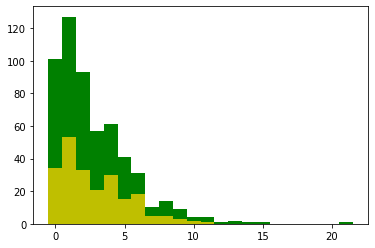

Bowler's Economy  :  2.78494623655914
Bowlership's Economy  :  2.809090909090909


Bowler's Skew     :  1.72157248125562
Bowlership's Skew :  0.6901070417681748
Bowler's Kurtosis     :  4.959617555917596
Bowlership's Kurtosis :  -0.49194020686865914


Greater : Statistics=104.50, p=0.46 
Two-Sided : Statistics=104.50, p=0.93 
Less : Statistics=104.50, p=0.55 

____________________________________________


RAS Lakmal N Pradeep


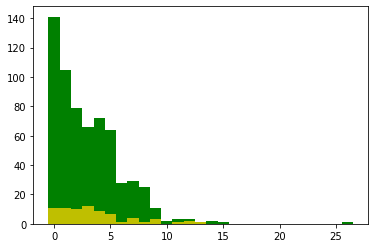

Bowler's Economy  :  3.0173775671406005
Bowlership's Economy  :  3.493150684931507


Bowler's Skew     :  1.6354135467550504
Bowlership's Skew :  0.2297926389056752
Bowler's Kurtosis     :  6.37237741117287
Bowlership's Kurtosis :  -1.661062745039579


Greater : Statistics=154.00, p=0.03 
Two-Sided : Statistics=154.00, p=0.07 
Less : Statistics=154.00, p=0.97 

____________________________________________


RAS Lakmal MDK Perera


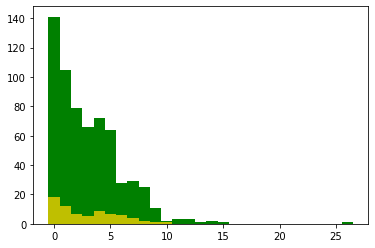

Bowler's Economy  :  3.0173775671406005
Bowlership's Economy  :  2.9305555555555554


Bowler's Skew     :  1.6354135467550504
Bowlership's Skew :  0.9761429958884246
Bowler's Kurtosis     :  6.37237741117287
Bowlership's Kurtosis :  0.3691554123626055


Greater : Statistics=122.00, p=0.09 
Two-Sided : Statistics=122.00, p=0.19 
Less : Statistics=122.00, p=0.91 

____________________________________________


RAS Lakmal HMRKB Herath


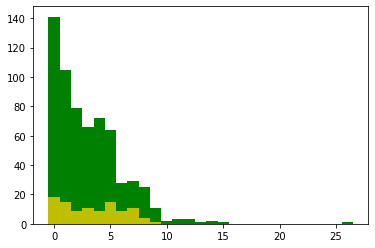

Bowler's Economy  :  3.0173775671406005
Bowlership's Economy  :  3.4215686274509802


Bowler's Skew     :  1.6354135467550504
Bowlership's Skew :  -0.2845823766956344
Bowler's Kurtosis     :  6.37237741117287
Bowlership's Kurtosis :  -0.5837813219724373


Greater : Statistics=101.50, p=0.21 
Two-Sided : Statistics=101.50, p=0.42 
Less : Statistics=101.50, p=0.80 

____________________________________________


RL Chase JO Holder


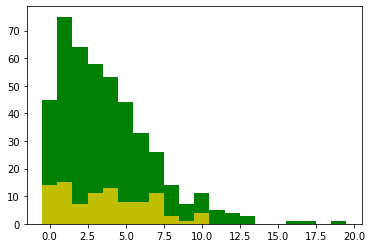

Bowler's Economy  :  3.748314606741573
Bowlership's Economy  :  3.705263157894737


Bowler's Skew     :  1.2611499268020037
Bowlership's Skew :  -0.21891277714868168
Bowler's Kurtosis     :  2.2817142634918524
Bowlership's Kurtosis :  -1.1427068371157714


Greater : Statistics=116.50, p=0.14 
Two-Sided : Statistics=116.50, p=0.29 
Less : Statistics=116.50, p=0.87 

____________________________________________


RL Chase ST Gabriel


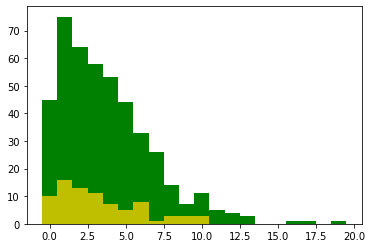

Bowler's Economy  :  3.748314606741573
Bowlership's Economy  :  3.3


Bowler's Skew     :  1.2611499268020037
Bowlership's Skew :  0.41069742967435946
Bowler's Kurtosis     :  2.2817142634918524
Bowlership's Kurtosis :  -0.9860777311081668


Greater : Statistics=124.50, p=0.08 
Two-Sided : Statistics=124.50, p=0.15 
Less : Statistics=124.50, p=0.93 

____________________________________________


RL Chase D Bishoo


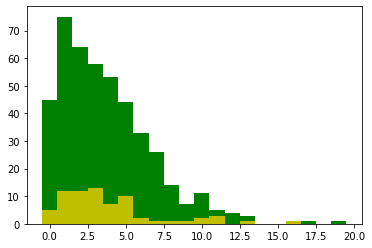

Bowler's Economy  :  3.748314606741573
Bowlership's Economy  :  3.816901408450704


Bowler's Skew     :  1.2611499268020037
Bowlership's Skew :  0.6614014832411336
Bowler's Kurtosis     :  2.2817142634918524
Bowlership's Kurtosis :  -1.2485426949053582


Greater : Statistics=178.00, p=0.01 
Two-Sided : Statistics=178.00, p=0.02 
Less : Statistics=178.00, p=0.99 

____________________________________________


S Shillingford SJ Benn


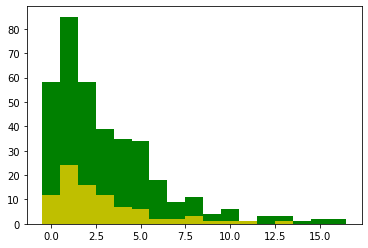

Bowler's Economy  :  3.102981029810298
Bowlership's Economy  :  2.7613636363636362


Bowler's Skew     :  1.620762752902226
Bowlership's Skew :  1.1733027088051688
Bowler's Kurtosis     :  3.0607813893569924
Bowlership's Kurtosis :  0.3564450827501431


Greater : Statistics=149.50, p=0.05 
Two-Sided : Statistics=149.50, p=0.11 
Less : Statistics=149.50, p=0.95 

____________________________________________


SCJ Broad MS Panesar


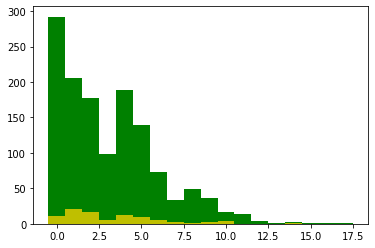

Bowler's Economy  :  3.1199400299850075
Bowlership's Economy  :  3.2111111111111112


Bowler's Skew     :  1.0339379749671007
Bowlership's Skew :  0.795011905681721
Bowler's Kurtosis     :  1.0221617094196631
Bowlership's Kurtosis :  -0.5377225962784311


Greater : Statistics=153.00, p=0.03 
Two-Sided : Statistics=153.00, p=0.06 
Less : Statistics=153.00, p=0.97 

____________________________________________


SCJ Broad CR Woakes


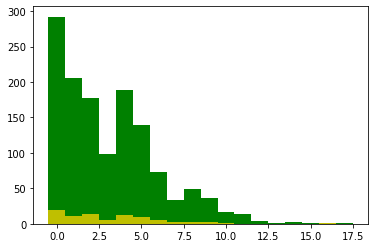

Bowler's Economy  :  3.1199400299850075
Bowlership's Economy  :  3.104651162790698


Bowler's Skew     :  1.0339379749671007
Bowlership's Skew :  0.6124760067519641
Bowler's Kurtosis     :  1.0221617094196631
Bowlership's Kurtosis :  -0.8009523034044026


Greater : Statistics=155.00, p=0.02 
Two-Sided : Statistics=155.00, p=0.05 
Less : Statistics=155.00, p=0.98 

SCJ Broad - CR Woakes better than SCJ Broad
____________________________________________


SCJ Broad JM Anderson


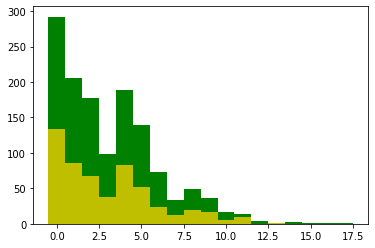

Bowler's Economy  :  3.1199400299850075
Bowlership's Economy  :  2.9708029197080292


Bowler's Skew     :  1.0339379749671007
Bowlership's Skew :  0.9790730500607167
Bowler's Kurtosis     :  1.0221617094196631
Bowlership's Kurtosis :  -0.00860047529596919


Greater : Statistics=121.00, p=0.44 
Two-Sided : Statistics=121.00, p=0.89 
Less : Statistics=121.00, p=0.57 

____________________________________________


SCJ Broad MM Ali


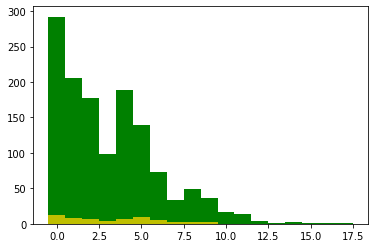

Bowler's Economy  :  3.1199400299850075
Bowlership's Economy  :  3.3333333333333335


Bowler's Skew     :  1.0339379749671007
Bowlership's Skew :  0.30257682392245444
Bowler's Kurtosis     :  1.0221617094196631
Bowlership's Kurtosis :  -0.825520833333333


Greater : Statistics=126.00, p=0.04 
Two-Sided : Statistics=126.00, p=0.09 
Less : Statistics=126.00, p=0.96 

____________________________________________


SCJ Broad GP Swann


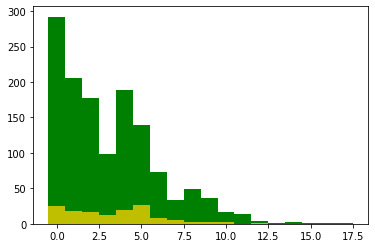

Bowler's Economy  :  3.1199400299850075
Bowlership's Economy  :  3.3093525179856114


Bowler's Skew     :  1.0339379749671007
Bowlership's Skew :  0.31992668449273
Bowler's Kurtosis     :  1.0221617094196631
Bowlership's Kurtosis :  -1.3719457392536334


Greater : Statistics=143.00, p=0.07 
Two-Sided : Statistics=143.00, p=0.14 
Less : Statistics=143.00, p=0.93 

____________________________________________


SJ Benn CH Gayle


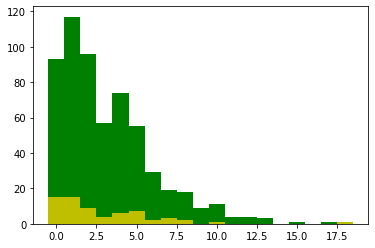

Bowler's Economy  :  3.1655405405405403
Bowlership's Economy  :  2.7846153846153845


Bowler's Skew     :  1.3936129704889237
Bowlership's Skew :  0.8714866483362139
Bowler's Kurtosis     :  2.564605983655391
Bowlership's Kurtosis :  -0.611882280661376


Greater : Statistics=135.00, p=0.03 
Two-Sided : Statistics=135.00, p=0.05 
Less : Statistics=135.00, p=0.98 

____________________________________________


SJ Benn JE Taylor


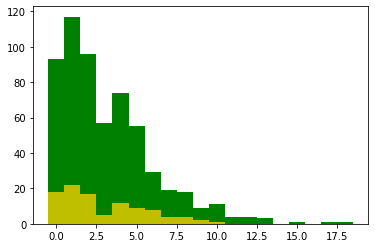

Bowler's Economy  :  3.1655405405405403
Bowlership's Economy  :  2.9411764705882355


Bowler's Skew     :  1.3936129704889237
Bowlership's Skew :  0.5552171878438281
Bowler's Kurtosis     :  2.564605983655391
Bowlership's Kurtosis :  -1.0361355176621172


Greater : Statistics=119.50, p=0.11 
Two-Sided : Statistics=119.50, p=0.23 
Less : Statistics=119.50, p=0.89 

____________________________________________


SJ Benn S Shillingford


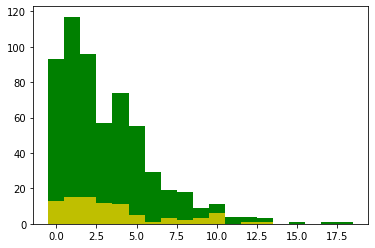

Bowler's Economy  :  3.1655405405405403
Bowlership's Economy  :  3.465909090909091


Bowler's Skew     :  1.3936129704889237
Bowlership's Skew :  0.3875013919711871
Bowler's Kurtosis     :  2.564605983655391
Bowlership's Kurtosis :  -1.5145041235822891


Greater : Statistics=155.00, p=0.03 
Two-Sided : Statistics=155.00, p=0.06 
Less : Statistics=155.00, p=0.97 

____________________________________________


SJ Benn KAJ Roach


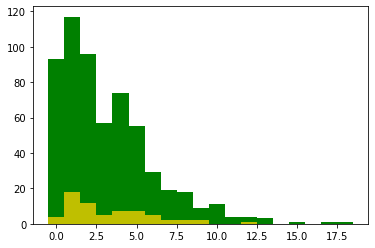

Bowler's Economy  :  3.1655405405405403
Bowlership's Economy  :  3.230769230769231


Bowler's Skew     :  1.3936129704889237
Bowlership's Skew :  1.3301226950479133
Bowler's Kurtosis     :  2.564605983655391
Bowlership's Kurtosis :  0.8856989886972024


Greater : Statistics=131.00, p=0.04 
Two-Sided : Statistics=131.00, p=0.08 
Less : Statistics=131.00, p=0.96 

____________________________________________


ST Finn JM Anderson


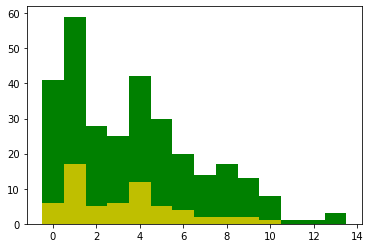

Bowler's Economy  :  3.7119205298013247
Bowlership's Economy  :  3.225806451612903


Bowler's Skew     :  0.7118844359235639
Bowlership's Skew :  1.363197796659778
Bowler's Kurtosis     :  -0.1869965794270736
Bowlership's Kurtosis :  0.86102938525329


Greater : Statistics=121.50, p=0.01 
Two-Sided : Statistics=121.50, p=0.02 
Less : Statistics=121.50, p=0.99 

ST Finn - JM Anderson better than ST Finn
____________________________________________


ST Gabriel JO Holder


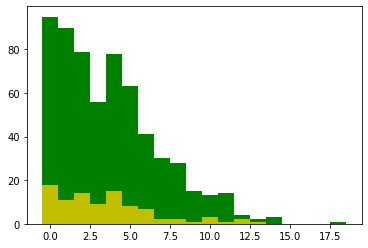

Bowler's Economy  :  3.718954248366013
Bowlership's Economy  :  3.4574468085106385


Bowler's Skew     :  0.9291357062377263
Bowlership's Skew :  0.6058751185137172
Bowler's Kurtosis     :  0.6545091665523444
Bowlership's Kurtosis :  -1.0208599946262782


Greater : Statistics=180.50, p=0.00 
Two-Sided : Statistics=180.50, p=0.00 
Less : Statistics=180.50, p=1.00 

ST Gabriel - JO Holder better than ST Gabriel
____________________________________________


ST Gabriel RL Chase


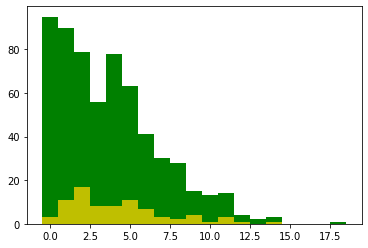

Bowler's Economy  :  3.718954248366013
Bowlership's Economy  :  4.25


Bowler's Skew     :  0.9291357062377263
Bowlership's Skew :  0.9523319133357167
Bowler's Kurtosis     :  0.6545091665523444
Bowlership's Kurtosis :  0.0446100275160104


Greater : Statistics=183.00, p=0.00 
Two-Sided : Statistics=183.00, p=0.00 
Less : Statistics=183.00, p=1.00 

____________________________________________


ST Gabriel KAJ Roach


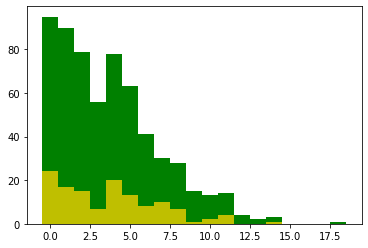

Bowler's Economy  :  3.718954248366013
Bowlership's Economy  :  3.6744186046511627


Bowler's Skew     :  0.9291357062377263
Bowlership's Skew :  0.45289690603157357
Bowler's Kurtosis     :  0.6545091665523444
Bowlership's Kurtosis :  -0.9041316643867847


Greater : Statistics=154.00, p=0.01 
Two-Sided : Statistics=154.00, p=0.03 
Less : Statistics=154.00, p=0.99 

ST Gabriel - KAJ Roach better than ST Gabriel
____________________________________________


Saeed Ajmal Umar Gul


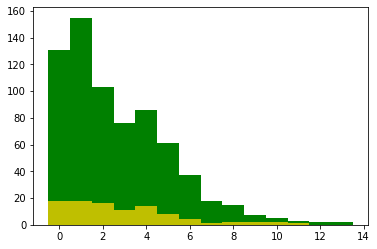

Bowler's Economy  :  2.7132667617689017
Bowlership's Economy  :  2.8350515463917527


Bowler's Skew     :  1.118705471296001
Bowlership's Skew :  0.3466778736272756
Bowler's Kurtosis     :  1.2849817772196825
Bowlership's Kurtosis :  -1.5530143269806207


Greater : Statistics=128.00, p=0.01 
Two-Sided : Statistics=128.00, p=0.02 
Less : Statistics=128.00, p=0.99 

____________________________________________


Saeed Ajmal Junaid Khan


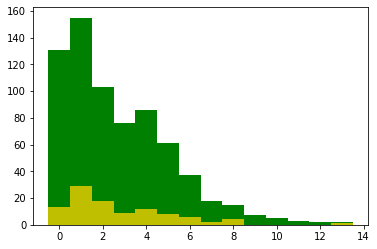

Bowler's Economy  :  2.7132667617689017
Bowlership's Economy  :  2.696078431372549


Bowler's Skew     :  1.118705471296001
Bowlership's Skew :  1.0736939307643203
Bowler's Kurtosis     :  1.2849817772196825
Bowlership's Kurtosis :  0.4758461843530264


Greater : Statistics=98.50, p=0.05 
Two-Sided : Statistics=98.50, p=0.10 
Less : Statistics=98.50, p=0.96 

____________________________________________


Saeed Ajmal Abdur Rehman


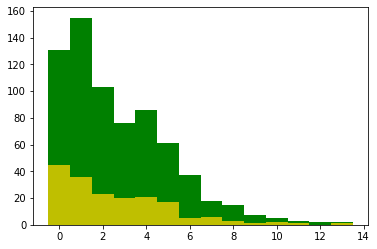

Bowler's Economy  :  2.7132667617689017
Bowlership's Economy  :  2.541436464088398


Bowler's Skew     :  1.118705471296001
Bowlership's Skew :  0.8873806794869868
Bowler's Kurtosis     :  1.2849817772196825
Bowlership's Kurtosis :  -0.35511058947094964


Greater : Statistics=129.00, p=0.03 
Two-Sided : Statistics=129.00, p=0.07 
Less : Statistics=129.00, p=0.97 

____________________________________________


Shakib Al Hasan Rubel Hossain


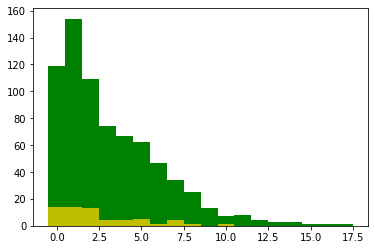

Bowler's Economy  :  3.202185792349727
Bowlership's Economy  :  2.377049180327869


Bowler's Skew     :  1.2681408535438607
Bowlership's Skew :  0.6509613611461849
Bowler's Kurtosis     :  1.7637607184848232
Bowlership's Kurtosis :  -1.269096609887617


Greater : Statistics=126.50, p=0.04 
Two-Sided : Statistics=126.50, p=0.08 
Less : Statistics=126.50, p=0.96 

____________________________________________


Shakib Al Hasan Mahmudullah


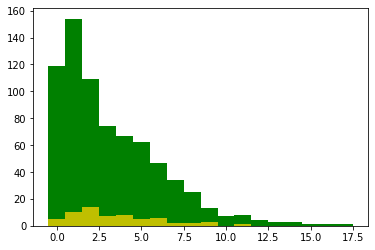

Bowler's Economy  :  3.202185792349727
Bowlership's Economy  :  3.492063492063492


Bowler's Skew     :  1.2681408535438607
Bowlership's Skew :  0.7556618961614062
Bowler's Kurtosis     :  1.7637607184848232
Bowlership's Kurtosis :  -0.15604244549787305


Greater : Statistics=137.50, p=0.04 
Two-Sided : Statistics=137.50, p=0.09 
Less : Statistics=137.50, p=0.96 

____________________________________________


Shakib Al Hasan Shahadat Hossain


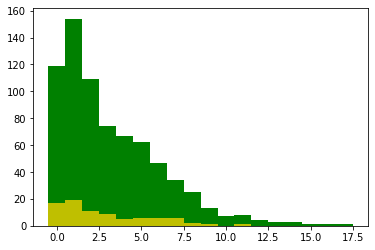

Bowler's Economy  :  3.202185792349727
Bowlership's Economy  :  2.7951807228915664


Bowler's Skew     :  1.2681408535438607
Bowlership's Skew :  0.7777382502627797
Bowler's Kurtosis     :  1.7637607184848232
Bowlership's Kurtosis :  -0.5169508920894352


Greater : Statistics=134.00, p=0.06 
Two-Sided : Statistics=134.00, p=0.12 
Less : Statistics=134.00, p=0.95 

____________________________________________


TA Boult TG Southee


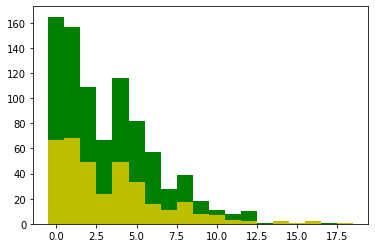

Bowler's Economy  :  3.3177142857142856
Bowlership's Economy  :  3.3333333333333335


Bowler's Skew     :  1.1883133715271545
Bowlership's Skew :  0.9740511458285169
Bowler's Kurtosis     :  1.665631987388374
Bowlership's Kurtosis :  -0.48188616042352006


Greater : Statistics=186.50, p=0.22 
Two-Sided : Statistics=186.50, p=0.44 
Less : Statistics=186.50, p=0.79 

____________________________________________


TA Boult C de Grandhomme


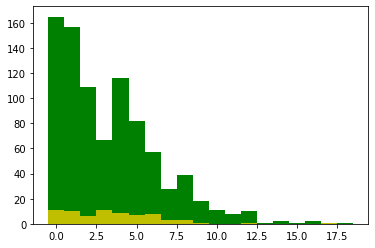

Bowler's Economy  :  3.3177142857142856
Bowlership's Economy  :  3.619718309859155


Bowler's Skew     :  1.1883133715271545
Bowlership's Skew :  -0.05448539170572611
Bowler's Kurtosis     :  1.665631987388374
Bowlership's Kurtosis :  -1.5464138191319494


Greater : Statistics=160.00, p=0.03 
Two-Sided : Statistics=160.00, p=0.06 
Less : Statistics=160.00, p=0.97 

____________________________________________


TA Boult N Wagner


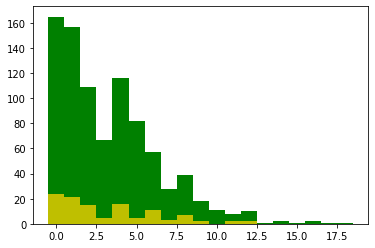

Bowler's Economy  :  3.3177142857142856
Bowlership's Economy  :  3.2035398230088497


Bowler's Skew     :  1.1883133715271545
Bowlership's Skew :  0.680518336268649
Bowler's Kurtosis     :  1.665631987388374
Bowlership's Kurtosis :  -0.9542131885298115


Greater : Statistics=142.50, p=0.13 
Two-Sided : Statistics=142.50, p=0.25 
Less : Statistics=142.50, p=0.88 

____________________________________________


TG Southee TA Boult


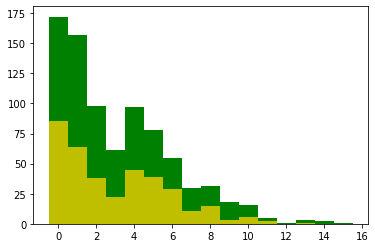

Bowler's Economy  :  3.1187878787878787
Bowlership's Economy  :  2.9833333333333334


Bowler's Skew     :  0.9728380244664594
Bowlership's Skew :  0.8749133055425247
Bowler's Kurtosis     :  0.5677496682227297
Bowlership's Kurtosis :  -0.1439431817872019


Greater : Statistics=122.00, p=0.22 
Two-Sided : Statistics=122.00, p=0.44 
Less : Statistics=122.00, p=0.79 

____________________________________________


TG Southee N Wagner


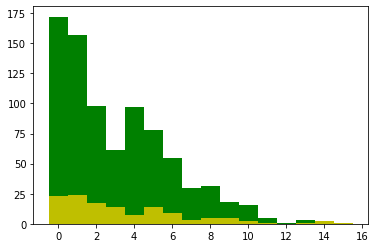

Bowler's Economy  :  3.1187878787878787
Bowlership's Economy  :  3.4765625


Bowler's Skew     :  0.9728380244664594
Bowlership's Skew :  0.8059146413480605
Bowler's Kurtosis     :  0.5677496682227297
Bowlership's Kurtosis :  -0.69935667336869


Greater : Statistics=179.50, p=0.01 
Two-Sided : Statistics=179.50, p=0.02 
Less : Statistics=179.50, p=0.99 

____________________________________________


Taijul Islam Mehedi Hasan Miraz


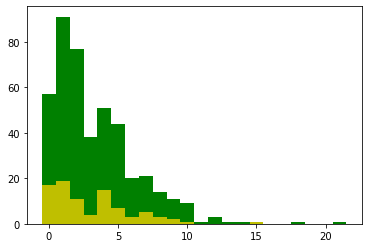

Bowler's Economy  :  3.3461538461538463
Bowlership's Economy  :  3.0454545454545454


Bowler's Skew     :  1.5400777988200334
Bowlership's Skew :  0.732801801075066
Bowler's Kurtosis     :  3.8428366239490055
Bowlership's Kurtosis :  -1.0115024629020863


Greater : Statistics=131.50, p=0.16 
Two-Sided : Statistics=131.50, p=0.33 
Less : Statistics=131.50, p=0.85 

____________________________________________


UT Yadav R Ashwin


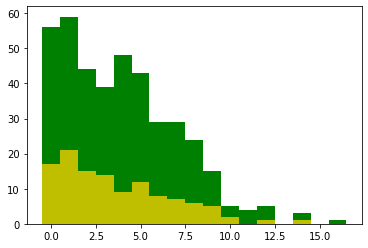

Bowler's Economy  :  3.9282178217821784
Bowlership's Economy  :  3.6016949152542375


Bowler's Skew     :  0.7660566040718852
Bowlership's Skew :  0.347468333657133
Bowler's Kurtosis     :  0.3029436094772331
Bowlership's Kurtosis :  -0.9297809061686717


Greater : Statistics=141.50, p=0.02 
Two-Sided : Statistics=141.50, p=0.04 
Less : Statistics=141.50, p=0.98 

UT Yadav - R Ashwin better than UT Yadav
____________________________________________


UT Yadav I Sharma


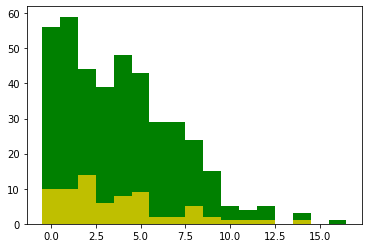

Bowler's Economy  :  3.9282178217821784
Bowlership's Economy  :  3.6666666666666665


Bowler's Skew     :  0.7660566040718852
Bowlership's Skew :  0.6024984388632629
Bowler's Kurtosis     :  0.3029436094772331
Bowlership's Kurtosis :  -0.9404820344583995


Greater : Statistics=171.00, p=0.00 
Two-Sided : Statistics=171.00, p=0.00 
Less : Statistics=171.00, p=1.00 

UT Yadav - I Sharma better than UT Yadav
____________________________________________


Umar Gul Danish Kaneria


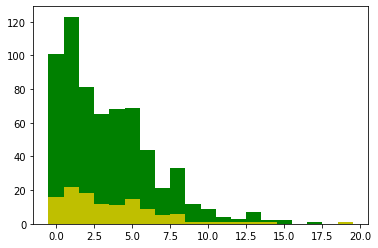

Bowler's Economy  :  3.459752321981424
Bowlership's Economy  :  3.6198347107438016


Bowler's Skew     :  1.2504581519287201
Bowlership's Skew :  0.5950935762970941
Bowler's Kurtosis     :  1.9738288243593205
Bowlership's Kurtosis :  -1.0154056354939702


Greater : Statistics=208.00, p=0.01 
Two-Sided : Statistics=208.00, p=0.03 
Less : Statistics=208.00, p=0.99 

____________________________________________


Umar Gul Mohammad Asif


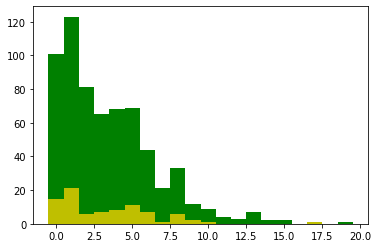

Bowler's Economy  :  3.459752321981424
Bowlership's Economy  :  3.2906976744186047


Bowler's Skew     :  1.2504581519287201
Bowlership's Skew :  0.9705290681538955
Bowler's Kurtosis     :  1.9738288243593205
Bowlership's Kurtosis :  0.2328167975216764


Greater : Statistics=151.50, p=0.03 
Two-Sided : Statistics=151.50, p=0.07 
Less : Statistics=151.50, p=0.97 

____________________________________________


Umar Gul Saeed Ajmal


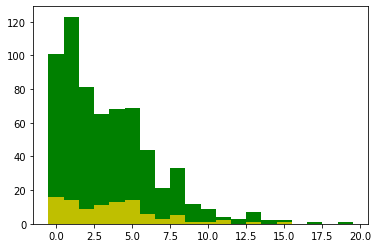

Bowler's Economy  :  3.459752321981424
Bowlership's Economy  :  3.6391752577319587


Bowler's Skew     :  1.2504581519287201
Bowlership's Skew :  0.3127069415305038
Bowler's Kurtosis     :  1.9738288243593205
Bowlership's Kurtosis :  -1.5106239648204909


Greater : Statistics=177.00, p=0.03 
Two-Sided : Statistics=177.00, p=0.05 
Less : Statistics=177.00, p=0.98 

____________________________________________


Umar Gul Abdur Rehman


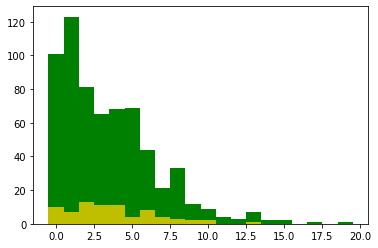

Bowler's Economy  :  3.459752321981424
Bowlership's Economy  :  3.6973684210526314


Bowler's Skew     :  1.2504581519287201
Bowlership's Skew :  0.2291296551290423
Bowler's Kurtosis     :  1.9738288243593205
Bowlership's Kurtosis :  -1.445205397444954


Greater : Statistics=147.00, p=0.05 
Two-Sided : Statistics=147.00, p=0.10 
Less : Statistics=147.00, p=0.95 

____________________________________________


VD Philander DW Steyn


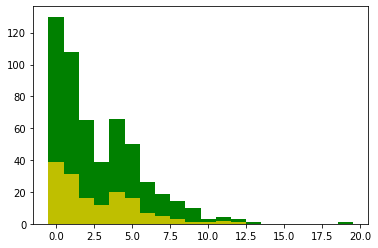

Bowler's Economy  :  2.7866419294990723
Bowlership's Economy  :  2.6818181818181817


Bowler's Skew     :  1.2884131156076744
Bowlership's Skew :  1.0272418667077257
Bowler's Kurtosis     :  2.3685125176611654
Bowlership's Kurtosis :  -0.030803019080615446


Greater : Statistics=130.50, p=0.07 
Two-Sided : Statistics=130.50, p=0.13 
Less : Statistics=130.50, p=0.94 

____________________________________________


VD Philander M Morkel


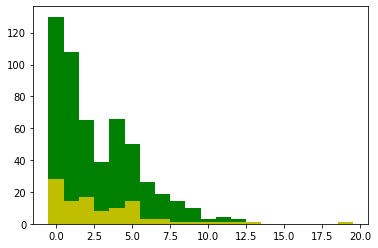

Bowler's Economy  :  2.7866419294990723
Bowlership's Economy  :  2.9134615384615383


Bowler's Skew     :  1.2884131156076744
Bowlership's Skew :  1.2941339818821158
Bowler's Kurtosis     :  2.3685125176611654
Bowlership's Kurtosis :  0.8167317118635267


Greater : Statistics=172.50, p=0.01 
Two-Sided : Statistics=172.50, p=0.01 
Less : Statistics=172.50, p=0.99 

____________________________________________


VD Philander K Rabada


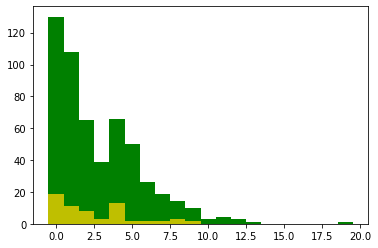

Bowler's Economy  :  2.7866419294990723
Bowlership's Economy  :  2.5538461538461537


Bowler's Skew     :  1.2884131156076744
Bowlership's Skew :  1.003416102082146
Bowler's Kurtosis     :  2.3685125176611654
Bowlership's Kurtosis :  -0.32138627467994274


Greater : Statistics=111.50, p=0.02 
Two-Sided : Statistics=111.50, p=0.04 
Less : Statistics=111.50, p=0.98 

VD Philander - K Rabada better than VD Philander
____________________________________________


VD Philander KA Maharaj


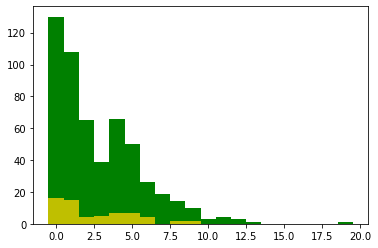

Bowler's Economy  :  2.7866419294990723
Bowlership's Economy  :  2.564516129032258


Bowler's Skew     :  1.2884131156076744
Bowlership's Skew :  0.940444700118405
Bowler's Kurtosis     :  2.3685125176611654
Bowlership's Kurtosis :  -0.6057878846412259


Greater : Statistics=93.00, p=0.07 
Two-Sided : Statistics=93.00, p=0.14 
Less : Statistics=93.00, p=0.94 

____________________________________________


Wahab Riaz Yasir Shah


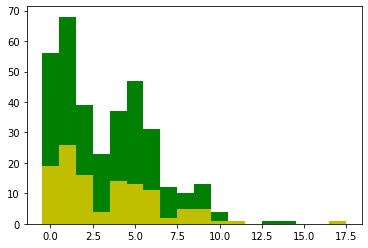

Bowler's Economy  :  3.372093023255814
Bowlership's Economy  :  3.3389830508474576


Bowler's Skew     :  0.938354449915342
Bowlership's Skew :  0.6841346068513284
Bowler's Kurtosis     :  1.126231837027822
Bowlership's Kurtosis :  -0.6264931434628633


Greater : Statistics=124.00, p=0.11 
Two-Sided : Statistics=124.00, p=0.23 
Less : Statistics=124.00, p=0.90 

____________________________________________


Yasir Shah Wahab Riaz


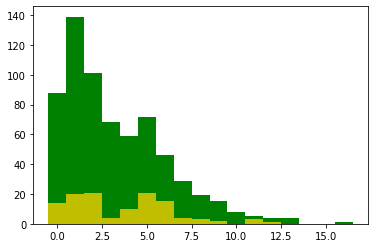

Bowler's Economy  :  3.2796352583586628
Bowlership's Economy  :  3.593220338983051


Bowler's Skew     :  1.0652586894216227
Bowlership's Skew :  0.34605588485889877
Bowler's Kurtosis     :  1.0107314507877065
Bowlership's Kurtosis :  -1.537409182977226


Greater : Statistics=136.00, p=0.01 
Two-Sided : Statistics=136.00, p=0.03 
Less : Statistics=136.00, p=0.99 

____________________________________________


Yasir Shah Mohammad Amir


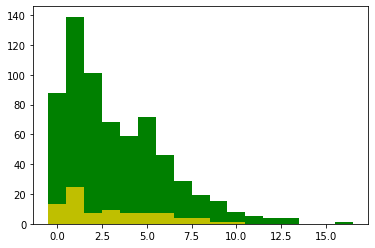

Bowler's Economy  :  3.2796352583586628
Bowlership's Economy  :  2.9411764705882355


Bowler's Skew     :  1.0652586894216227
Bowlership's Skew :  1.6037275043027275
Bowler's Kurtosis     :  1.0107314507877065
Bowlership's Kurtosis :  2.162468061995729


Greater : Statistics=127.00, p=0.01 
Two-Sided : Statistics=127.00, p=0.02 
Less : Statistics=127.00, p=0.99 

Yasir Shah - Mohammad Amir better than Yasir Shah
____________________________________________


Yasir Shah Mohammad Abbas


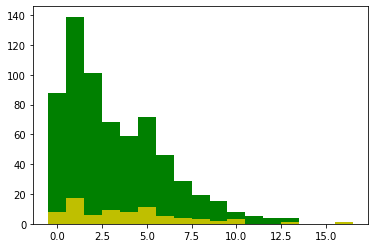

Bowler's Economy  :  3.2796352583586628
Bowlership's Economy  :  3.871794871794872


Bowler's Skew     :  1.0652586894216227
Bowlership's Skew :  1.0112620785995967
Bowler's Kurtosis     :  1.0107314507877065
Bowlership's Kurtosis :  0.49319727891156484


Greater : Statistics=156.50, p=0.00 
Two-Sided : Statistics=156.50, p=0.01 
Less : Statistics=156.50, p=1.00 

____________________________________________


Z Khan I Sharma


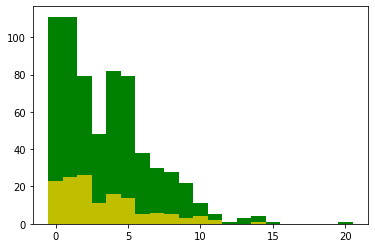

Bowler's Economy  :  3.521406727828746
Bowlership's Economy  :  3.25531914893617


Bowler's Skew     :  1.0528859880311225
Bowlership's Skew :  0.6154753035834523
Bowler's Kurtosis     :  1.4555354726687133
Bowlership's Kurtosis :  -1.1433768549577834


Greater : Statistics=147.00, p=0.07 
Two-Sided : Statistics=147.00, p=0.13 
Less : Statistics=147.00, p=0.94 

____________________________________________


Z Khan Harbhajan Singh


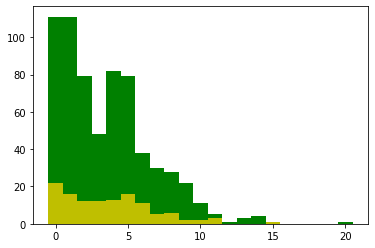

Bowler's Economy  :  3.521406727828746
Bowlership's Economy  :  3.6611570247933884


Bowler's Skew     :  1.0528859880311225
Bowlership's Skew :  0.30340392264266036
Bowler's Kurtosis     :  1.4555354726687133
Bowlership's Kurtosis :  -0.9959533515481693


Greater : Statistics=149.50, p=0.05 
Two-Sided : Statistics=149.50, p=0.11 
Less : Statistics=149.50, p=0.95 

____________________________________________


Z Khan A Kumble


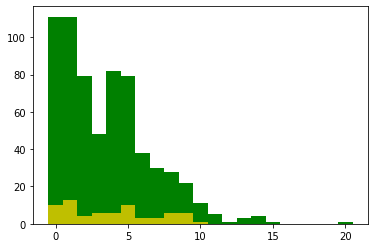

Bowler's Economy  :  3.521406727828746
Bowlership's Economy  :  3.8823529411764706


Bowler's Skew     :  1.0528859880311225
Bowlership's Skew :  0.49293011449115864
Bowler's Kurtosis     :  1.4555354726687133
Bowlership's Kurtosis :  -0.6132356880220127


Greater : Statistics=131.00, p=0.04 
Two-Sided : Statistics=131.00, p=0.08 
Less : Statistics=131.00, p=0.96 

____________________________________________




In [12]:
from collections import Counter 
from scipy.stats import skew, kurtosis
from scipy.stats import mannwhitneyu

with open("Test-econ-edges.csv",'w') as fw:
    for name in Bpartner_qualified.keys():
        dfbowler = og_data.loc[og_data['bowler'] == name]
        for pname in Bpartner_qualified[name]:
            print(name,pname)
            dfpairab = paired_data.loc[paired_data['bowler1']==name] 
            dfpairab = dfpairab.loc[dfpairab['bowler2']==pname]
            dfpairba = paired_data.loc[paired_data['bowler2']==name]
            dfpairba = dfpairba.loc[dfpairba['bowler1']==pname]

            dict_1 = Counter(dict(dfpairab['runs1'].value_counts())) 
            dict_2 = Counter(dict(dfpairba['runs2'].value_counts()))
            fin_dict = dict(dict_1 + dict_2)
            fin_df = pd.DataFrame(fin_dict.items())

            pure_dict = dict(dfbowler['runs'].value_counts())
            plt.bar(*zip(*pure_dict.items()),color='g',width=1.0)
            plt.bar(*zip(*fin_dict.items()),color='y',width=1.0)

            plt.show()

            s=0
            d=0
            for k,v in pure_dict.items():
                s = s + k*v
                d = d + v
            be = s/d
            print("Bowler's Economy  : ",be)
            s=0
            d=0
            for k,v in fin_dict.items():
                s = s + k*v
                d = d + v
            bse = s/d 
            print("Bowlership's Economy  : ",bse)
            print('\n')

            print("Bowler's Skew     : ",skew(dfbowler['runs'].dropna()))
            print("Bowlership's Skew : ",skew((fin_df[1].dropna())))

            print("Bowler's Kurtosis     : ",kurtosis(dfbowler['runs'].dropna()))
            print("Bowlership's Kurtosis : ",kurtosis((fin_df[1].dropna())))

            print('\n')

            alpha = 0.05

            batch_1 = dfbowler['runs'].value_counts()
            batch_2 = fin_df[1]

            stat1, p_value1 = mannwhitneyu(batch_1, batch_2, alternative="greater") 
            print('Greater : Statistics=%.2f, p=%.2f ' % (stat1, p_value1)) 

            #if p_value1 < alpha: 
                #print('Reject Null Hypothesis => batch1 NOT GREATER than batch2') 
            #else: 
                #print('Do not Reject Null Hypothesis => batch1 GREATER THAN EQUAL TO batch2')

            stat2, p_value2 = mannwhitneyu(batch_1, batch_2, alternative="two-sided") 
            print('Two-Sided : Statistics=%.2f, p=%.2f ' % (stat2, p_value2)) 

            #if p_value2 < alpha: 
                #print('Reject Null Hypothesis => batch1 NOT EQUAL to batch2') 
            #else: 
                #print('Do not Reject Null Hypothesis => batch1 is EQUAL to batch2')

            stat3, p_value3 = mannwhitneyu(batch_1, batch_2, alternative="less") 
            print('Less : Statistics=%.2f, p=%.2f \n' % (stat3, p_value3)) 

            #if p_value3 < alpha: 
                #print('Reject Null Hypothesis => batch1 NOT LESS than batch2') 
            #else: 
                #print('Do not Reject Null Hypothesis => batch1 LESS THAN EQUAL TO batch2')

            if (p_value1 < alpha) and (p_value2 < alpha) and (be > bse):
                print(name,"-",pname,"better than",name)
                fw.write(name+','+pname+'\n')
            if (p_value3 < alpha) and (p_value2 < alpha):
                print(name,"-",pname, "worse than",name)

            print('____________________________________________\n\n')
fw.close()      
#print(fin_dict)
#print(fin_df)

In [13]:
import networkx as nx

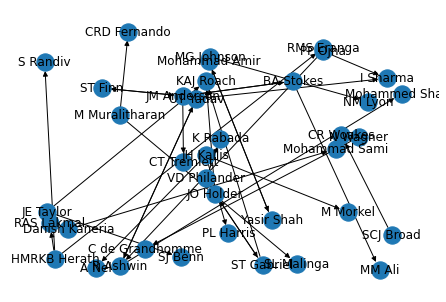

In [14]:
G = nx.read_edgelist('Test-econ-edges.csv',create_using=nx.DiGraph(), delimiter=",")
nx.draw_random(G,with_labels=True)
plt.show()